# 공공 데이터 활용 Project
> ### 여름방학 특강

# (1) 주제 선정 이유

서울 지하철 관련 유동인구와 상권정보 빅데이터는 우리 교과목의 심화 및 학습 측면에서 적절한 데이터
- 서울 지하철 역 관련 데이터는 빅데이터 처리 활용과 학습 측면에서 적절한 데이터 
- 서울 지하철 역 중심의 상권정보를 분석해 유동인구와의 관계성 분석

이를 위해 다음 공공데이터를 활용하고자 한다.
- 서울시 열린데이터광장
    https://data.seoul.go.kr/
- 공공데이터포탈
    https://www.data.go.kr/index.do

# (2) 주제 정의

**서울시 지하철역의 시간대별, 일별 승하차인원 공공데이터 분석을 통해 지하철역 중심 서울시 유동인구의 흐름을 파악하고 상권정보와 지하철2호선 역사와의 관계성 분석**

- 지하철 2호선에서 시간대별 승하차인원 데이터를 가공해 시각화하고 그 의미를 분석하며 이를 활용해 향후 버스나 지하철 등의 공공교통수단의 증설에도 활용 가능 
- 지하철역의 시간대별 승하차인원으로 혼잡시간을 파악하여 피하면 좋을 출퇴근 시간 파악
- 지하철역의 월별 전반적인 유동인구 파악을 통해 1년간의 유동인구 변화의 원인을 파악
- 지하철 2호선의 역 위치와 기본 정보를 지도 기반의 시각화 구현 
- 지하철 2호선의 역 위치에 승하차인원 정보를 지도 기반의 시각화 구현 
- 지하철 2호선의 역 위치와 상권분석을 통해 지도 기반의 시각화 구현 

# (3) 인터넷을 통한 데이터 획득

`서울 열린데이터 광장`에서 공공 API로 다음 데이터를 획득한다.
- https://data.seoul.go.kr/index.do
    - 서울시 지하철호선별 역별 시간대별 승하차 인원 정보: 시간대별 월 통계
        - http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do#AXexec
    - 서울시 지하철호선별 역별 승하차 인원 정보: 일별 통계
        - http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do


`공공데이터포털`에서 공공API로 다음 데이터를 획득한다.
-  https://www.data.go.kr/index.do
    - 위도, 경도에 따른 저장한 반경내 상권정보 
        - https://www.data.go.kr/data/15012005/openapi.do

## 3-1 먼저 CSV(Comma Separated Value) 파일로 내려받아 데이터 구조 파악

> 데이터 분석을 위해 대부분의 자료는 공공API 호출 방식으로 자료를 읽어올 예정이나 일부 데이터는 먼저 데이터 구조의 확인을 위해 파일로 다운로드해 자료의 구조와 내용을 점검

> * 데이터 `서울시 지하철호선별 역별 시간대별 승하차 인원 정보`를 CSV(Comma Separated Value) 형태로 가져와 저장
> * 파일 `DOWNLOAD_서울지하철_역별시간별_승하차인원.csv`

- 발생할 수 있는 경고를 제거하기 위해 다음 수행

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### 위  CSV 파일을 노트패드로 열어 utf-8 인코딩 방식으로 다시 다음 파일로 저장 후 판다스로 읽어 오자.
    * DOWNLOAD_서울지하철_역별시간별_승하차인원.csv

In [ ]:
import pandas as pd

# 한글 처리를 위해 인코딩 utf-8로 읽기
df = pd.read_csv('DOWNLOAD_서울지하철_역별시간별_승하차인원.csv', encoding='utf-8')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202103,1호선,동대문,607,10,12572,1965,8945,6697,14117,...,8508,9,1251,1,0,0,0,0,0,20210403
1,202103,1호선,동묘앞,73,1,2888,815,3453,4739,5946,...,2317,2,1127,1,2,0,0,0,0,20210403
2,202103,1호선,서울역,668,19,9048,5684,11314,32628,35812,...,7559,9,487,0,0,0,0,0,0,20210403
3,202103,1호선,시청,20,0,1722,3784,2707,18444,6099,...,1242,2,72,0,0,0,0,0,0,20210403
4,202103,1호선,신설동,361,13,7927,2898,7826,9755,17350,...,5072,9,308,1,1,0,0,0,0,20210403


In [ ]:
import pandas as pd

# 한글 처리를 위해 인코딩 utf-8로 읽기
df = pd.read_csv('DOWNLOAD_서울지하철_역별시간별_승하차인원.csv')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202103,1호선,동대문,607,10,12572,1965,8945,6697,14117,...,8508,9,1251,1,0,0,0,0,0,20210403
1,202103,1호선,동묘앞,73,1,2888,815,3453,4739,5946,...,2317,2,1127,1,2,0,0,0,0,20210403
2,202103,1호선,서울역,668,19,9048,5684,11314,32628,35812,...,7559,9,487,0,0,0,0,0,0,20210403
3,202103,1호선,시청,20,0,1722,3784,2707,18444,6099,...,1242,2,72,0,0,0,0,0,0,20210403
4,202103,1호선,신설동,361,13,7927,2898,7826,9755,17350,...,5072,9,308,1,1,0,0,0,0,20210403


In [ ]:
import pandas as pd

# 한글 처리를 위해 인코딩 utf-8로 읽기
# df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='utf-8')
df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')
# df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202105,1호선,동대문,741,10,12809,1940,8433,7185,13545,...,8224,17,1299,0,0,0,1,0,0,20210603
1,202105,1호선,동묘앞,58,1,3025,1014,3345,4647,5623,...,2466,0,1257,0,1,0,0,0,0,20210603
2,202105,1호선,서울역,600,17,8791,6009,11666,35011,33985,...,8134,24,553,1,1,0,0,0,0,20210603
3,202105,1호선,시청,49,1,1775,4133,2943,20020,5880,...,1464,2,88,0,0,0,0,0,0,20210603
4,202105,1호선,신설동,271,3,7617,2998,7628,10369,15678,...,5598,12,391,0,0,0,0,0,0,20210603


#### 데이터의 구조 파악
- 2015년 1월부터 2021년 3월까지 총 43514개의 행
- 호선명과 지하철역, 시간대별(아침 4시부터 24시간 시간대별) 승하차인원, 작업일자 등 52개의 열 

In [ ]:
df.shape
# len(df)

(44730, 52)

In [ ]:
# 열 이름 파악
df.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')

In [ ]:
# 마지막 5개 자료
df.tail() 

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
44725,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
44726,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
44727,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
44728,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
44729,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [ ]:
# 서울 지하철의 호선명 종류와 호선에 떄른 데이터 수 파악
df['호선명'].value_counts()

5호선         3956
7호선         3927
2호선         3850
경부선         3003
6호선         2944
분당선         2691
3호선         2618
경원선         2310
경의선         2134
4호선         2002
9호선         1925
중앙선         1593
경인선         1540
경춘선         1463
8호선         1309
안산선         1001
수인선          994
공항철도 1호선     984
일산선          811
1호선          770
경강선          627
과천선          616
우이신설선        585
장항선          462
9호선2~3단계     390
9호선2단계       225
Name: 호선명, dtype: int64

In [ ]:
# 서울 지하철의 호선명 갯수
df['호선명'].value_counts().count()

26

In [ ]:
# 지하철 역명
df['지하철역'].value_counts()

서울역            424
공덕             323
김포공항           269
홍대입구           248
디지털미디어시티       244
              ... 
사리               9
하남시청(덕풍?신장)      3
강일               3
하남검단산            3
평택지제             1
Name: 지하철역, Length: 579, dtype: int64

In [ ]:
df['지하철역'].value_counts().count()

579

## 3-2 공공API로 다음 데이터 내려받기
> `서울시 지하철호선별 역별 월별 시간대별 승하차 인원 정보` 
> * API_2021년3월_지하철역별_시간대별_승하차인원.csv
    > > * 오픈 API로 데이터를 얻어오기 위해 다음 사이트에서 인증키를 신청 후 사용
    > > * https://data.seoul.go.kr/together/mypage/actkeyMain.do
    > > * 서울열린데이터광장 '서울시 지하철호선별 역별 시간대별 승하차 인원 정보' 공공API 호출 방식 참조
    > > * http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do#AXexec
    > > * 다음으로 url 주소 확인, 인증키를 실제 키 값으로 입력하면 조회 가능
    > > * 2015년 1월 지하철 호선별 역별 시간대별 승객 현황 조회(1에서 1000천 조회. 천개 이상은 조회 불가)
    > > * http://openapi.seoul.go.kr:8088/(인증키)/xml/CardSubwayTime/1/1000/201501/        

* 2021년 3월 지하철 호선별 역별 시간대별 승객 현황 조회(1에서 1000번 조회)를 위한 URL 구성

In [ ]:
# 받은 인증키 저장
valid_key = '자신의키를입력'
# 가져올 시작 번호, 끝 번호 지정, 1000번 이상은 오류 발생
start, end = 1, 1000 
# 년월 지정
month = '202103' 

#URL 주소 완성
url = 'http://openapi.seoul.go.kr:8088/'
url += valid_key + '/json/CardSubwayTime/'
url += str(start) + '/' + str(end) + '/' + month
url

'http://openapi.seoul.go.kr:8088/7a47797456676865313133704270746e/json/CardSubwayTime/1/1000/202103'

* 코딩 전에 위 URL로 웹브라우저에서 JSON 형태로 내려받기를 먼저 테스트
    * http://openapi.seoul.go.kr:8088/자신의키를입력/json/CardSubwayTime/1/1000/202103

* '서울시 지하철호선별 역별 시간대별 승하차 인원 정보' 오픈 API 호출로 내려받기
    * JSON 형식으로 저장
    * JSON 데이터를 판다스의 데이티프레임 df에 저장해 구조 파악
        - 606행 52열

In [ ]:
pd.json_normalize?

In [ ]:
pd.read_json('[{"A": 1, "B": 2}, {"A": 3, "B": 4}]')

,A,B
0,1,2
1,3,4


In [ ]:
pd.json_normalize([{"A": 1, "B": 2}, {"A": 3, "B": 4}])

,A,B
0,1,2
1,3,4


In [ ]:
a_dict = {
    'school': 'ABC primary school',
    'location': 'London',
    'ranking': 2,
}
df_test = pd.json_normalize(a_dict)
df_test

,school,location,ranking
0,ABC primary school,London,2


In [ ]:
a_dict = {
    'school': 'ABC primary school',
    'location': 'London',
    'ranking': {
        'nested school': 'Nested primary school',
        'neated location': 'Souel'}
    }
df_test = pd.json_normalize(a_dict)
df_test

,school,location,ranking.nested school,ranking.neated location
0,ABC primary school,London,Nested primary school,Souel


* 사전리스트 생성

In [ ]:
dlist = [ {c:i for c in list('ABCD')} for i in range(4) ]
dlist

[{'A': 0, 'B': 0, 'C': 0, 'D': 0},
 {'A': 1, 'B': 1, 'C': 1, 'D': 1},
 {'A': 2, 'B': 2, 'C': 2, 'D': 2},
 {'A': 3, 'B': 3, 'C': 3, 'D': 3}]

In [ ]:
import pandas as pd
mydf = pd.json_normalize(dlist)
mydf

,A,B,C,D
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3


In [ ]:
mydf.to_json('mydata.json')
pd.read_json('mydata.json')

,A,B,C,D
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3


In [ ]:
!type mydata.json

{"A":{"0":0,"1":1,"2":2,"3":3},"B":{"0":0,"1":1,"2":2,"3":3},"C":{"0":0,"1":1,"2":2,"3":3},"D":{"0":0,"1":1,"2":2,"3":3}}


---

In [ ]:
import urllib
import json
import pandas as pd

# url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")
json_str[:500]

'{"CardSubwayTime":{"list_total_count":606,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"USE_MON":"202103","LINE_NUM":"1호선","SUB_STA_NM":"서울역","FOUR_RIDE_NUM":668.0,"FOUR_ALIGHT_NUM":19.0,"FIVE_RIDE_NUM":9048.0,"FIVE_ALIGHT_NUM":5684.0,"SIX_RIDE_NUM":11314.0,"SIX_ALIGHT_NUM":32628.0,"SEVEN_RIDE_NUM":35812.0,"SEVEN_ALIGHT_NUM":85372.0,"EIGHT_RIDE_NUM":56518.0,"EIGHT_ALIGHT_NUM":181087.0,"NINE_RIDE_NUM":41700.0,"NINE_ALIGHT_NUM":117196.0,"TEN_RIDE_NUM":40292.0,"TEN_ALIGHT_NUM":58642.'

In [ ]:
# 받은 데이터가 문자열이라서 이를 json으로 변환한다.
json_object = json.loads(json_str)
json_object

{'CardSubwayTime': {'list_total_count': 606,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_MON': '202103',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'FOUR_RIDE_NUM': 668.0,
    'FOUR_ALIGHT_NUM': 19.0,
    'FIVE_RIDE_NUM': 9048.0,
    'FIVE_ALIGHT_NUM': 5684.0,
    'SIX_RIDE_NUM': 11314.0,
    'SIX_ALIGHT_NUM': 32628.0,
    'SEVEN_RIDE_NUM': 35812.0,
    'SEVEN_ALIGHT_NUM': 85372.0,
    'EIGHT_RIDE_NUM': 56518.0,
    'EIGHT_ALIGHT_NUM': 181087.0,
    'NINE_RIDE_NUM': 41700.0,
    'NINE_ALIGHT_NUM': 117196.0,
    'TEN_RIDE_NUM': 40292.0,
    'TEN_ALIGHT_NUM': 58642.0,
    'ELEVEN_RIDE_NUM': 46987.0,
    'ELEVEN_ALIGHT_NUM': 48646.0,
    'TWELVE_RIDE_NUM': 55219.0,
    'TWELVE_ALIGHT_NUM': 49128.0,
    'THIRTEEN_RIDE_NUM': 57982.0,
    'THIRTEEN_ALIGHT_NUM': 50513.0,
    'FOURTEEN_RIDE_NUM': 50787.0,
    'FOURTEEN_ALIGHT_NUM': 46957.0,
    'FIFTEEN_RIDE_NUM': 63899.0,
    'FIFTEEN_ALIGHT_NUM': 50613.0,
    'SIXTEEN_RIDE_NUM': 73143.0,
    'SIXTEEN_A

In [ ]:
df = pd.json_normalize(json_object['CardSubwayTime']['row'])
df.shape

(606, 52)

In [ ]:
import urllib
import json
import pandas as pd

# url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")

# 받은 데이터가 문자열이라서 이를 json으로 변환한다.
json_object = json.loads(json_str)

# ['CardSubwayStatsNew']['row']를 데이터프레임 df로 불러오기
df = pd.json_normalize(json_object['CardSubwayTime']['row'])
df.shape

(606, 52)

* API로 획득한 데이터를 저장
    * 2021년 3월 지하철 호선별 역별 시간대별 승하차인원
        * API_2021년3월_지하철역별시간대별_승하차인원.csv

In [ ]:
df.to_csv('API_2021년3월_지하철역별_시간대별_승하차인원.csv', encoding='ms949')
df.head()

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,202103,1호선,서울역,668.0,19.0,9048.0,5684.0,11314.0,32628.0,35812.0,...,7559.0,9.0,487.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403
1,202103,1호선,동묘앞,73.0,1.0,2888.0,815.0,3453.0,4739.0,5946.0,...,2317.0,2.0,1127.0,1.0,2.0,0.0,0.0,0.0,0.0,20210403
2,202103,1호선,시청,20.0,0.0,1722.0,3784.0,2707.0,18444.0,6099.0,...,1242.0,2.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403
3,202103,1호선,종각,147.0,1.0,2181.0,4199.0,2947.0,21373.0,5269.0,...,1341.0,17.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403
4,202103,1호선,종로3가,147.0,29.0,2834.0,3189.0,2790.0,10922.0,4327.0,...,1924.0,23.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403


* 다시 읽어와 저장 확인

In [ ]:
import pandas as pd

df2 = pd.read_csv('API_2021년3월_지하철역별_시간대별_승하차인원.csv', encoding='ms949', index_col = 0)
df2.head()

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,202103,1호선,서울역,668.0,19.0,9048.0,5684.0,11314.0,32628.0,35812.0,...,7559.0,9.0,487.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403
1,202103,1호선,동묘앞,73.0,1.0,2888.0,815.0,3453.0,4739.0,5946.0,...,2317.0,2.0,1127.0,1.0,2.0,0.0,0.0,0.0,0.0,20210403
2,202103,1호선,시청,20.0,0.0,1722.0,3784.0,2707.0,18444.0,6099.0,...,1242.0,2.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403
3,202103,1호선,종각,147.0,1.0,2181.0,4199.0,2947.0,21373.0,5269.0,...,1341.0,17.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403
4,202103,1호선,종로3가,147.0,29.0,2834.0,3189.0,2790.0,10922.0,4327.0,...,1924.0,23.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403


- pandas의 pd.json_normalize 파악 
    - 딕셔너리 비슷한 JSON 포멧의 평탄화 작업에 위해 데이터프레임으로 생성
        - https://ichi.pro/ko/modeun-pandas-json-normalize-json-pyeongmyeonhwa-e-daehae-al-ayahabnida-21899532810205
        

In [ ]:
import pandas as pd

a_dict = {
    'school': 'ABC primary school',
    'location': 'London',
    'ranking': 2,
}

df = pd.json_normalize(a_dict)
df

,school,location,ranking
0,ABC primary school,London,2


In [ ]:
json_list = [
    { 'class': 'Year 1', 'student number': 20, 'room': 'Yellow' },
    { 'class': 'Year 2', 'student number': 25, 'room': 'Blue' },
]
pd.json_normalize(json_list)

,class,student number,room
0,Year 1,20,Yellow
1,Year 2,25,Blue


In [ ]:
json_list = [
    { 'class': 'Year 1', 'num_of_students': 20, 'room': 'Yellow' },
    { 'class': 'Year 2', 'room': 'Blue' }, # no num_of_students
]
pd.json_normalize(json_list)

,class,num_of_students,room
0,Year 1,20.0,Yellow
1,Year 2,NaN,Blue


- 모든 중첩 된 값은 평면화되고 별도의 열로 변환

In [ ]:
json_obj = {
    'school': 'ABC primary school',
    'location': 'London',
    'ranking': 2,
    'info': {
        'president': 'John Kasich',
        'contacts': {
          'email': {
              'admission': 'admission@abc.com',
              'general': 'info@abc.com'
          },
          'tel': '123456789',
      }
    }
}
pd.json_normalize(json_obj)

,school,location,ranking,info.president,info.contacts.email.admission,info.contacts.email.general,info.contacts.tel
0,ABC primary school,London,2,John Kasich,admission@abc.com,info@abc.com,123456789


### 서울 열린데이터 광장의 오픈 API의 구체적인 사용방법
> 특히 선택적 '요청인자' 사용방법 
> > * https://data.seoul.go.kr/together/notice/faqList.do?seq=d47bc57aea53d6c6ab244c05a6eb2259&bbsCd=10002&ditcCd=FAQ02
> > * /검색어1(필수)/ : 정상
> > * / : 오류(필수 검색어 누락)
> > * /검색어2(선택)/ : 비정상 (오류는 나지 않지만, 원치 않는 검색 결과)
> > * /검색어1(필수)/검색어2(선택)/ : 정상
> > * /검색어1(필수)/검색어3(선택)/ : 비정상 (오류는 나지 않지만, 원치 않는 검색 결과)
> > * /검색어1(필수)/(공백필수)/검색어3(선택)/ : 정상

> 선택 요청인자 
> > * LINE_NUM, STRING(선택): 호선명, 문자열, 예) 1호선
> > * SUB_STA_NM, STRING(선택): 지하철역, 문자열, 예) 강남 

![option](request_param.png)

* 2호선 강남, 2021년 3월로 제한한 URL

In [ ]:
# url 변수 완성
import urllib.parse

#기초 데이터 입력
valid_key = '자신의키를입력'
start = 1 #가져올 시작 번호
end = 1000 #가져올 끝 번호, 1000번 이상은 오류 발생
month = '202103' # 월

# 선택인자 사용: 2호선 강남역만 가져오기
#URL 주소 완성
url = 'http://openapi.seoul.go.kr:8088/'
url += valid_key + '/json/CardSubwayTime/'
url += str(start) + '/' + str(end) + '/' + month

#URL에 있는 힌글처리
line_num = '2호선'
line_num = urllib.parse.quote_plus(line_num)
url += '/' + line_num
sta_name = '강남'
sta_name = urllib.parse.quote_plus(sta_name)
url += '/' + sta_name

url

'http://openapi.seoul.go.kr:8088/7a47797456676865313133704270746e/json/CardSubwayTime/1/1000/202103/2%ED%98%B8%EC%84%A0/%EA%B0%95%EB%82%A8'

In [ ]:
import urllib
import json
import pandas as pd

# url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")

# 받은 데이터가 문자열이라서 이를 json으로 변환한다.
json_object = json.loads(json_str)
df = pd.json_normalize(json_object['CardSubwayTime']['row'])
df.shape

(1, 52)

* 2호선 강남, 2021년 3월로 제한하면 결국 1행의 결과

In [ ]:
df

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,202103,2호선,강남,77.0,3.0,5965.0,11488.0,15581.0,50172.0,36460.0,...,12771.0,8.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,20210403


In [ ]:
# 열수 
len(df.columns)

52

In [ ]:
# 2호선 강남의 시간대별 승하차 수만으로 데이터프레임 구성  
kn_df = df.iloc[0, 3:len(df.columns)-1]
kn_df

FOUR_RIDE_NUM                  77
FOUR_ALIGHT_NUM                 3
FIVE_RIDE_NUM                5965
FIVE_ALIGHT_NUM             11488
SIX_RIDE_NUM                15581
SIX_ALIGHT_NUM              50172
SEVEN_RIDE_NUM              36460
SEVEN_ALIGHT_NUM           153487
EIGHT_RIDE_NUM              58142
EIGHT_ALIGHT_NUM           325012
NINE_RIDE_NUM               47214
NINE_ALIGHT_NUM            320265
TEN_RIDE_NUM                46279
TEN_ALIGHT_NUM             145315
ELEVEN_RIDE_NUM             63532
ELEVEN_ALIGHT_NUM          105538
TWELVE_RIDE_NUM             79723
TWELVE_ALIGHT_NUM          102383
THIRTEEN_RIDE_NUM           96866
THIRTEEN_ALIGHT_NUM        123967
FOURTEEN_RIDE_NUM          105644
FOURTEEN_ALIGHT_NUM        109371
FIFTEEN_RIDE_NUM           130097
FIFTEEN_ALIGHT_NUM         103266
SIXTEEN_RIDE_NUM           148775
SIXTEEN_ALIGHT_NUM         105790
SEVENTEEN_RIDE_NUM         225786
SEVENTEEN_ALIGHT_NUM       132722
EIGHTEEN_RIDE_NUM          339281
EIGHTEEN_ALIGH

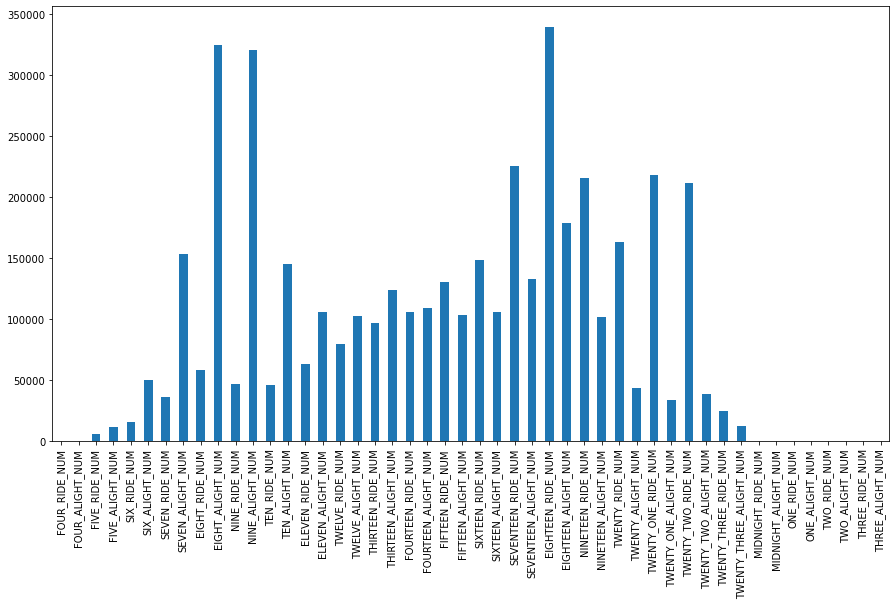

In [ ]:
import matplotlib.pyplot as plt

#plt.rc('figure', figsize=(15, 8))
plt.figure(figsize=(15, 8))
_ = kn_df.plot(kind='bar')

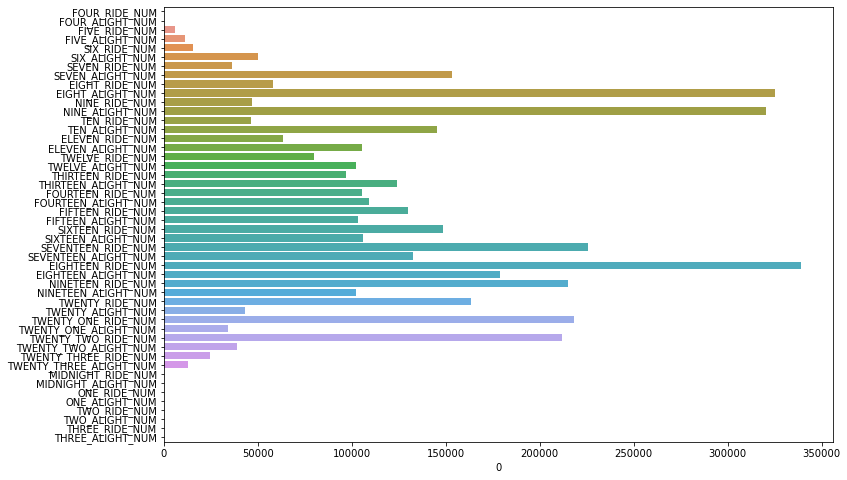

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=kn_df, y=kn_df.index);

- 지하철 2호선 2021년 4월 시간대별 승하차인원 생성 

In [ ]:
# url 변수 완성
import urllib.parse

#기초 데이터 입력
valid_key = '자신의키를입력'
start, end  = 1, 100 #가져올 시작 번호, 가져올 끝 번호, 1000번 이상은 오류 발생
month = '202104' # 월

# 선택인자 사용: 2호선 모두 가져오기
url = 'http://openapi.seoul.go.kr:8088/'
url += valid_key + '/json/CardSubwayTime/'
url += str(start) + '/' + str(end) + '/' + month

#URL에 있는 힌글처리
line_num = urllib.parse.quote_plus('2호선')
url += '/' + line_num

url

'http://openapi.seoul.go.kr:8088/7a47797456676865313133704270746e/json/CardSubwayTime/1/100/202104/2%ED%98%B8%EC%84%A0'

In [ ]:
import urllib
import json
import pandas as pd

# url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")

# 받은 데이터가 문자열이라서 이를 json으로 변환한다.
json_object = json.loads(json_str)
df = pd.json_normalize(json_object['CardSubwayTime']['row'])
df.shape

(50, 52)

* 열이름 한글로 모두 수정

In [ ]:
df.columns = ['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자']
df.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
45,202104,2호선,신설동,35.0,0.0,1063.0,418.0,1366.0,2416.0,3682.0,...,1221.0,1.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
46,202104,2호선,도림천,4.0,0.0,270.0,301.0,1105.0,869.0,3119.0,...,668.0,1.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
47,202104,2호선,양천구청,7.0,0.0,4500.0,858.0,11132.0,2130.0,32642.0,...,7082.0,1.0,438.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
48,202104,2호선,신정네거리,41.0,0.0,8373.0,1199.0,16685.0,3982.0,50001.0,...,8885.0,10.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
49,202104,2호선,용두(동대문구청),31.0,0.0,1079.0,135.0,1547.0,830.0,4711.0,...,1167.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503


- 지하철 2호선 2021년 4월 시간대별 승하차인원 파일 저장 

In [ ]:
df.to_csv('API_2021년4월_지하철2호선역별_시간대별_승하차인원.csv', encoding='ms949')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202104,2호선,시청,12.0,0.0,798.0,1483.0,1913.0,14072.0,4621.0,...,1410.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
1,202104,2호선,을지로입구,61.0,1.0,1643.0,1803.0,2751.0,27978.0,7699.0,...,3275.0,1.0,1281.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
2,202104,2호선,을지로3가,4.0,0.0,819.0,1671.0,1989.0,16640.0,5226.0,...,1715.0,2.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
3,202104,2호선,을지로4가,4.0,2.0,905.0,1074.0,1550.0,11953.0,2869.0,...,1207.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
4,202104,2호선,동대문역사문화공원(DDP),370.0,2.0,6366.0,907.0,4912.0,7262.0,6371.0,...,5607.0,2.0,405.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503


* 2021년4월 지하철2호선 역별시간대별 승하차인원 정보를 읽어와 다시 저장 확인

In [ ]:
import pandas as pd
hour_line2 = pd.read_csv('API_2021년4월_지하철2호선역별_시간대별_승하차인원.csv', encoding='ms949', index_col = 0)
hour_line2.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202104,2호선,시청,12.0,0.0,798.0,1483.0,1913.0,14072.0,4621.0,...,1410.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
1,202104,2호선,을지로입구,61.0,1.0,1643.0,1803.0,2751.0,27978.0,7699.0,...,3275.0,1.0,1281.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
2,202104,2호선,을지로3가,4.0,0.0,819.0,1671.0,1989.0,16640.0,5226.0,...,1715.0,2.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
3,202104,2호선,을지로4가,4.0,2.0,905.0,1074.0,1550.0,11953.0,2869.0,...,1207.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503
4,202104,2호선,동대문역사문화공원(DDP),370.0,2.0,6366.0,907.0,4912.0,7262.0,6371.0,...,5607.0,2.0,405.0,0.0,0.0,0.0,0.0,0.0,0.0,20210503


- - - 

## 3-3 서울시 지하철 일별 역별 승하차인원 정보 획득
> `서울열린데이터광장 '서울시 지하철호선별 역별 승하차 인원 정보`
> * 데이터 및 오픈 API 호출 방식 참조
> * http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
> > * API_2021년4월1일_지하철역별일별_승하차인원.csv


* 바로 오픈 API 호출로 데이터 내려받기
    * 2021년 4월 1일, 서울시 지하철호선별 역별 승하차 인원 정보를 위한 URL 생성

In [ ]:
# url 변수 완성
# url = "http://openapi.seoul.go.kr:8088/yourkeyhere/json/CardSubwayStatsNew/1/1000/20200601"

#기초 데이터 입력
valid_key = '자신의키를입력'
start = 1 #가져올 시작 번호
end = 1000 #가져올 끝 번호, 1000번 이상은 오류 발생
date = '20210401' # 날짜

#URL 주소 완성
url = 'http://openapi.seoul.go.kr:8088/'
url += valid_key + '/json/CardSubwayStatsNew/'
url += str(start) + '/' + str(end) + '/' + date 
url

'http://openapi.seoul.go.kr:8088/7a47797456676865313133704270746e/json/CardSubwayStatsNew/1/1000/20210401'

In [ ]:
import urllib
import json

# url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")

# 받은 데이터가 문자열이라서 이를 json으로 변환한다.
json_object = json.loads(json_str)
# 5개 행 보기
json_object['CardSubwayStatsNew']['row'][:5]

[{'USE_DT': '20210401',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '서울역',
  'RIDE_PASGR_NUM': 41201.0,
  'ALIGHT_PASGR_NUM': 38888.0,
  'WORK_DT': '20210404'},
 {'USE_DT': '20210401',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '동묘앞',
  'RIDE_PASGR_NUM': 8727.0,
  'ALIGHT_PASGR_NUM': 9137.0,
  'WORK_DT': '20210404'},
 {'USE_DT': '20210401',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '시청',
  'RIDE_PASGR_NUM': 21816.0,
  'ALIGHT_PASGR_NUM': 22115.0,
  'WORK_DT': '20210404'},
 {'USE_DT': '20210401',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '종각',
  'RIDE_PASGR_NUM': 34502.0,
  'ALIGHT_PASGR_NUM': 33300.0,
  'WORK_DT': '20210404'},
 {'USE_DT': '20210401',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '종로3가',
  'RIDE_PASGR_NUM': 25724.0,
  'ALIGHT_PASGR_NUM': 23189.0,
  'WORK_DT': '20210404'}]

In [ ]:
# 데이터프레임에 저장
import pandas as pd

# ['CardSubwayStatsNew']['row']를 데이터프레임 df로 불러오는 것은 아래와 같다.
seoul0401 = pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
seoul0401.shape

(601, 6)

In [ ]:
seoul0401.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210401,1호선,서울역,41201.0,38888.0,20210404
1,20210401,1호선,동묘앞,8727.0,9137.0,20210404
2,20210401,1호선,시청,21816.0,22115.0,20210404
3,20210401,1호선,종각,34502.0,33300.0,20210404
4,20210401,1호선,종로3가,25724.0,23189.0,20210404


* API로 획득한 데이터를 저장
    * 2021년 4월 1일 지하철 호선별 역별 일별 승하차인원
        * API_2021년4월1일_지하철역별일별_승하차인원.csv

In [ ]:
seoul0401.to_csv('API_2021년4월1일_지하철역별일별_승하차인원.csv', encoding="ms949")

* 저장 확인

In [ ]:
import pandas as pd

df = pd.read_csv('API_2021년4월1일_지하철역별일별_승하차인원.csv', encoding='ms949', index_col = 0)
df.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210401,1호선,서울역,41201.0,38888.0,20210404
1,20210401,1호선,동묘앞,8727.0,9137.0,20210404
2,20210401,1호선,시청,21816.0,22115.0,20210404
3,20210401,1호선,종각,34502.0,33300.0,20210404
4,20210401,1호선,종로3가,25724.0,23189.0,20210404


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 600
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USE_DT            601 non-null    int64  
 1   LINE_NUM          601 non-null    object 
 2   SUB_STA_NM        601 non-null    object 
 3   RIDE_PASGR_NUM    601 non-null    float64
 4   ALIGHT_PASGR_NUM  601 non-null    float64
 5   WORK_DT           601 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 32.9+ KB


In [ ]:
df.groupby('LINE_NUM').sum()

,USE_DT,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
LINE_NUM,,,,
1호선,202104010,217543.0,211453.0,202104040
2호선,1010520050,1326236.0,1340705.0,1010520200
3호선,687153634,500148.0,499268.0,687153736
4호선,525470426,475911.0,477045.0,525470504
5호선,1131782456,645185.0,643270.0,1131782624
6호선,747784837,321827.0,316685.0,747784948
7호선,1030730451,691621.0,684584.0,1030730604
8호선,343576817,184304.0,184822.0,343576868
9호선,505260025,271698.0,274892.0,505260100


In [ ]:
df.groupby('LINE_NUM')[['RIDE_PASGR_NUM', 'ALIGHT_PASGR_NUM']].sum()

,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM
LINE_NUM,,
1호선,217543.0,211453.0
2호선,1326236.0,1340705.0
3호선,500148.0,499268.0
4호선,475911.0,477045.0
5호선,645185.0,643270.0
6호선,321827.0,316685.0
7호선,691621.0,684584.0
8호선,184304.0,184822.0
9호선,271698.0,274892.0


---

## 3-4 서울시 지하철 2호선의 2019년 승하차 연인원 정보 시각화를 위한 정보 획득
> 지도 시각화를 위해 다음의 두 가지 데이터가 필요
> * 지하철 2호선 2019년 1월 1일부터 12월 31일까지 승하차인원 정보
> > * 위에서 살펴본 `서울열린데이터광장 '서울시 지하철호선별 역별 승하차 인원 정보'` 데이터 및 오픈 API 호출 방식 참조
> > * http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
> > > * API_서울지하철_2019년_일별승하차인원.csv


> * 지하철 2호선 역의 위도, 경도 위치 정보
> > * 공공데이터포털에서 전국도시철도역사정보 표준데이터 다운로드 
> > * 역사 정보는 자주 수정되는 자료가 아니므로 직접 파일로 다운로드
> > > * DOWNLOAD_전국도시철도역사정보_표준데이터.csv
> > > * https://www.data.go.kr/data/15013205/standard.do

#### 지하철 2호선 2019년 1월 1일부터 12월 31일까지 승하차인원 정보 획득
* 일자별 '20190101'로 API 호출이 가능하므로 2019년 모든 날짜를 생성
    * 생성된 모든 날짜로 API를 호출해 2019년 전체 정보를 저장
        * 파일 DOWNLOAD_전국도시철도역사정보표준데이터.csv

* 2019년 1월 1일 서울지하철 승차인원 API 다시 확인

In [ ]:
def getURL(date):
    # 기초 데이터 입력
    valid_key = '자신의키를입력'
    # 1000번 이상은 오류 발생
    start, end = 1, 1000 #가져올 시작 번호, #가져올 끝 번호,
    url = 'http://openapi.seoul.go.kr:8088/'
    url += valid_key + '/json/CardSubwayStatsNew/'
    url += str(start) + '/' + str(end) + '/' + date 
    return url

getURL('20190101')

'http://openapi.seoul.go.kr:8088/7a47797456676865313133704270746e/json/CardSubwayStatsNew/1/1000/20190101'

* API를 위한 날짜와 URL 생성 
    * 2019년 모든 날짜를 리스트 date_range()로 생성

In [ ]:
import pandas as pd

# date2019 = pd.date_range(start = '2019-1-1', periods=365)
date2019 = pd.date_range(start = '2019-1-1', end = '2019-12-31')
date2019

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

* 2019년 모든 날짜를 리스트 lst2019에 추가

In [ ]:
lst2019 = []
for date in date2019:
    lst2019.append(f'{str(date)[:4]}{str(date)[5:7]}{str(date)[8:10]}')
lst2019[-10:]

['20191222',
 '20191223',
 '20191224',
 '20191225',
 '20191226',
 '20191227',
 '20191228',
 '20191229',
 '20191230',
 '20191231']

* 문자열에서 숫자만 남기는 다른 방법 3가지

In [ ]:
string = '2021-03-01'

new_string = ''.join(char for char in string if char.isdigit())
print(new_string)

20210301


In [ ]:
lst2019 = []
for date in date2019:
    s = str(date)[:10]
    lst2019.append(''.join(c for c in s if c.isdigit()))
lst2019[-10:]

['20191222',
 '20191223',
 '20191224',
 '20191225',
 '20191226',
 '20191227',
 '20191228',
 '20191229',
 '20191230',
 '20191231']

In [ ]:
string = '2021-03-01'

new_string = ''.join(filter(str.isdigit, string)) 
print(new_string)

20210301


In [ ]:
lst2019 = []
for date in date2019:
    s = str(date)[:10]
    lst2019.append(''.join(filter(str.isdigit, s)))
lst2019[-10:]

['20191222',
 '20191223',
 '20191224',
 '20191225',
 '20191226',
 '20191227',
 '20191228',
 '20191229',
 '20191230',
 '20191231']

In [ ]:
import re

string = '2021-03-01'

new_string = re.sub(r"[^0-9]", "", string) 
print(new_string)

20210301


In [ ]:
lst2019 = []
for date in date2019:
    lst2019.append(re.sub(r'[^0-9]', '', str(date)[:10]))
lst2019[-10:]

['20191222',
 '20191223',
 '20191224',
 '20191225',
 '20191226',
 '20191227',
 '20191228',
 '20191229',
 '20191230',
 '20191231']

* 문제

In [ ]:
string = 'py-th-on'
print(''.join(filter(str.isalpha, string)))

python


#### 2019년 전체를 API를 통해 데이터프레임 생성
* 하루의 승하차인원 데이터프레임 반환 함수 작성

In [ ]:
import urllib
import json
import pandas as pd

def getDataFrame(url):
    # url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")

    # 받은 데이터가 문자열이라서 이를 json으로 변환한다.
    json_object = json.loads(json_str)
    return pd.json_normalize(json_object['CardSubwayStatsNew']['row'])

* 하루의 승하차인원 정보의 행 자료 수가 몇개인지 확인
    * 1000개 이상이면 다른 방안을 찾아야 하나 592개 임을 확인

In [ ]:
test2019 = getDataFrame(getURL(lst2019[0]))
test2019.shape

(592, 6)

* 2019년 승하차인원 정보 전체 데이터프레임 whole2019 생성
    * 다음은 시간이 많이 소요되므로 한번만 실행해 파일로 저장할 예정
        * 다음 코드는 실행하지 않아도 다음 파일에 저장해 사용 가능 
            * API_서울지하철_2019년_일별_승하차인원.csv

In [ ]:
# 다음을 선택하고 ctrl + / 누르면 주석 제거(toggle 가능), 약 1분 소요
whole2019 = getDataFrame(getURL(lst2019[0]))
for date in lst2019[1:]:
    whole2019 = whole2019.append(getDataFrame(getURL(date)))
whole2019

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20190101,1호선,서울역,39420.0,31121.0,20190104
1,20190101,1호선,시청,11807.0,10322.0,20190104
2,20190101,1호선,종각,20944.0,16658.0,20190104
3,20190101,1호선,종로3가,17798.0,15762.0,20190104
4,20190101,1호선,종로5가,13578.0,13282.0,20190104
...,...,...,...,...,...,...
587,20191231,중앙선,오빈,283.0,281.0,20200103
588,20191231,중앙선,양평,2969.0,3287.0,20200103
589,20191231,중앙선,원덕,347.0,348.0,20200103
590,20191231,중앙선,용문,1771.0,2059.0,20200103


* 파일 API_서울지하철_2019년_일별승하차인원.csv에 저장 후 확인

In [ ]:
whole2019.to_csv('API_서울지하철_2019년_일별_승하차인원.csv', encoding="ms949")

In [ ]:
df = pd.read_csv('API_서울지하철_2019년_일별_승하차인원.csv', encoding="ms949", index_col = 0)
df.shape

(215769, 6)

In [ ]:
df.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20190101,1호선,서울역,39420.0,31121.0,20190104
1,20190101,1호선,시청,11807.0,10322.0,20190104
2,20190101,1호선,종각,20944.0,16658.0,20190104
3,20190101,1호선,종로3가,17798.0,15762.0,20190104
4,20190101,1호선,종로5가,13578.0,13282.0,20190104


* 다운로드한 역사의 위치 정보 확인
    * 파일 DOWNLOAD_서울교통공사_도시철도역사정보.csv 읽어 확인

In [ ]:
import pandas as pd
station = pd.read_csv('DOWNLOAD_서울교통공사_도시철도역사정보.csv', encoding='ms949')
station.head(2)

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,150,서울역,S1101,서울 도시철도 1호선,Seoul Station,首爾站,환승역,S1104+I4107,서울 도시철도 4호선+경의중앙선,37.555753,126.972456,서울교통공사,서울특별시 중구 세종대로 지하 2 (남대문로 5가),02-6110-1331,2021-04-09
1,151,시청,S1101,서울 도시철도 1호선,City Hall,市廳,환승역,S1102,서울 도시철도 2호선,37.564717,126.976751,서울교통공사,서울특별시 중구 세종대로 지하 101 (정동),02-6110-1321,2021-04-09


* 2호선의 역사명만 출력

In [ ]:
station[station['노선명'].str.contains('2호선')]['역사명']

10          까치산
11           시청
12        을지로입구
13        을지로3가
14        을지로4가
15    동대문역사문화공원
16           신당
17         상왕십리
18          왕십리
19          한양대
20           뚝섬
21           성수
22         건대입구
23           구의
24           강변
25         잠실나루
26           잠실
27         잠실새내
28        종합운동장
29           삼성
30           선릉
31           역삼
32           강남
33           교대
34           서초
35           방배
36           사당
37          낙성대
38        서울대입구
39           봉천
40           신림
41          신대방
42      구로디지털단지
43           대림
44          신도림
45           문래
46        영등포구청
47           당산
48           합정
49         홍대입구
50           신촌
51           이대
52           아현
53          충정로
54           용답
55           신답
56          신설동
57          도림천
58         양천구청
59        신정네거리
60           용두
Name: 역사명, dtype: object

---

### 3-5 서울지하철 2호선과 상권정보 분석을 위한 강남역 정보 획득
   * 서울의 대표 지하철인 2호선 역사 위치 반경 500미터 내의 상권정보 시각화
   * 상권정보는 지역을 그림으로 표시하며, 마우스를 클릭하면 상권면적을 표시 
       * 공공데이터포털에서 상권정보를 활용
           * https://www.data.go.kr/index.do
       * 위도, 경도에 따른 반경내 상권정보 공공API 활용
           * ttps://www.data.go.kr/data/15012005/openapi.do

#### 공공데이터포털에서 강남역 [경도, 위도] 기준 반경 500미터 상권정보 공공 API 호출 테스트


- 서비스 인증키 활용
    - REST 방식의 인증키 활용
    - http://apis.data.go.kr/B553077/api/open/sdsc/오퍼레이션명/필수항목1.../필수항목n?ServiceKey=서비스키&옵션항목1=옵션항목1값......&옵션항목n=옵션항목값n

- 반경내 상권조회: 위 오퍼레이션명이 storeZoneInRadius
    - http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius/필수항목1.../필수항목n?ServiceKey=서비스키&옵션항목1=옵션항목1값......&옵션항목n=옵션항목값n
        
- 예로, 강남역 (경도, 위도) = (127.0281, 37.4972), 반경 500미터인 경우 URL
    - http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius?radius=500&cx=127.0281&cy=37.4972&ServiceKey= 


- 공공API URL 생성 점검

In [ ]:
# 신청해서 받은 서비스키 저장
ServiceKey = '자신의키를입력'
# 주요 패라미터 
loc = [127.028054, 37.497202] # [경도, 위도] 
rad = 500 #반경 500m
typ = 'json' # json, 아예 제거하면 xml 형식 

#URL 주소 완성
url = 'http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius?'
s = f'radius={rad}&cx={loc[0]}&cy={loc[1]}&type={typ}&ServiceKey={ServiceKey}'
url += s
url

'http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius?radius=500&cx=127.028054&cy=37.497202&type=json&ServiceKey=0ZK%2FAhy%2F4X44%2BkuhZYKo0Rwf9%2BFQM0D3UAorf%2FTERn%2BzUPv7%2BYOBfbp71I8iLfA4URBF9%2BXQbb0AuD42UHqT8Q%3D%3D'

* 코딩 전에 위 URL로 웹브라우저에서 JSON 형태로 내려받기를 먼저 테스트
    * http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius?radius=500&cx=127.0281&cy=37.4972&type=json&ServiceKey=자신의키를입력

* `서울시 지하철 2호선의 강남역 500미터 근처 상권정보` 공공API 호출로 내려받기
    * JSON 형식으로 저장한 주요 열만 저장된 df 생성

In [ ]:
import urllib
import json
import pandas as pd

# url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")

# 받은 데이터가 문자열이라서 이를 json으로 변환해 데이터프레임에 저장
json_object = json.loads(json_str)
df = pd.json_normalize(json_object['body']['items'])
df.columns = ['상권번호', '상권명', '시도코드', '시도명', '시군구코드', '시군구명', '면적', '좌표개수', '좌표값', '데이터기준일자']
df= df[['상권번호', '상권명', '면적', '좌표개수', '좌표값']]
df

,상권번호,상권명,면적,좌표개수,좌표값
0,1923,서울 강남구 강남역_2,158325.0,13,"POLYGON ((127.024688 37.503738, 127.024397 37...."
1,1887,서울 강남구 강남역_1,117740.3,20,"POLYGON ((127.02782 37.497182, 127.027744 37.4..."
2,1893,서울 강남구 강남역,167613.1,34,"POLYGON ((127.03033 37.495439, 127.030553 37.4..."


- 첫번째 행, 좌표값 문자열에서 실수형태의 문자열만 추출해, 4개만 출력 

In [ ]:
df['좌표값'][0][8:][2:-2]

'127.024688 37.503738, 127.024397 37.504339, 127.021232 37.503385, 127.021499 37.502855, 127.022265 37.503069, 127.022777 37.501938, 127.0236 37.502143, 127.025214 37.49893, 127.023513 37.498403, 127.024209 37.497066, 127.025855 37.497458, 127.027398 37.497984, 127.024688 37.503738'

In [ ]:
# 문자열인 좌표값을 추출하기 위한 연산
pts = df['좌표값'][0][8:][2:-2]
# 구분자 ,를 제거한 후, 모든 실수형태의 문자열을 구분자 ' '로 분리
pts = pts.replace(',', '').split(' ')
pts[:4]

['127.024688', '37.503738', '127.024397', '37.504339']

- 패키지 folium에서 사용하기 위해 [위도, 경도] 위치를 교환해 실수 리스트에 저장하기 위한 컴프리헨션 연산

In [ ]:
lines = [ [float(pts[i+1]), float(pts[i])] for i in range(0, len(pts), 2) ]
lines

[[37.503738, 127.024688],
 [37.504339, 127.024397],
 [37.503385, 127.021232],
 [37.502855, 127.021499],
 [37.503069, 127.022265],
 [37.501938, 127.022777],
 [37.502143, 127.0236],
 [37.49893, 127.025214],
 [37.498403, 127.023513],
 [37.497066, 127.024209],
 [37.497458, 127.025855],
 [37.497984, 127.027398],
 [37.503738, 127.024688]]

- 데이터프레임 df의 모든 행에서 좌표값을 리스트로 추출

In [ ]:
# 데이터프레임의 모든 좌표를 저장한 리스트
polygons = []
for i in range(len(df)):
    pts = df['좌표값'][i][8:][2:-2].replace(',', '').split(' ')
    lines = [ [ float(pts[i+1]), float(pts[i]) ] for i in range(0, len(pts), 2) ]
    polygons.append(lines)
polygons[1]

[[37.497182, 127.02782],
 [37.497352, 127.027744],
 [37.497649, 127.026907],
 [37.496857, 127.024348],
 [37.496248, 127.024638],
 [37.496489, 127.02543],
 [37.496432, 127.025557],
 [37.496323, 127.025509],
 [37.49608, 127.024718],
 [37.495304, 127.025088],
 [37.495799, 127.026667],
 [37.494147, 127.027454],
 [37.493894, 127.026609],
 [37.49299, 127.027049],
 [37.493124, 127.027509],
 [37.493217, 127.027464],
 [37.493335, 127.027843],
 [37.492595, 127.028197],
 [37.493086, 127.029803],
 [37.497182, 127.02782]]

- 강남역의 상권 지역을 그리기

In [ ]:
!pip install folium

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip show folium

Name: folium
Version: 0.12.1
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: c:\python39\lib\site-packages
Requires: branca, jinja2, requests, numpy
Required-by: 


In [ ]:
import site

In [ ]:
site.getsitepackages()

['C:\\Anaconda3', 'C:\\Anaconda3\\lib\\site-packages']

In [ ]:
import folium

# center = [37.4972, 127.0281] # 강남역 위치 
# 주요 패라미터 
loc = [127.028054, 37.497202] # [경도, 위도] 
center = [loc[1], loc[0]] # 강남역 위치 
map = folium.Map(location = center, zoom_start = 14)

for i in range(len(polygons)):
    folium.Polygon(
        locations = polygons[i],
        fill = True,
        tooltip = '강남역 상권'
    ).add_to(map)

map

---

# (4) 분석을 위한 데이터의 가공

## 4-1 2021년 4월 서울지하철 2호선에서 역별 시간대별 승하차인원 정보
> * 서울시 2호선지하철 2021년 4월 역별 시간대별 승하차인원 정보 파일에서 읽어 가공  
> * 서울시 2호선지하철 2021년 4월 역별 주요 시간대별 승차 인원 파일 저장
>    * PREPRC_지하철2호선_2021년4월_승차인원.csv
> * 서울시 2호선지하철 2021년 4월 역별 주요 시간대별 하차 인원 파일 저장
>    * PREPRC_지하철2호선_2021년4월_하차인원.csv

* 2021년4월 지하철2호선 역별시간대별 승하차인원 정보를 읽어와 다시 저장 확인

In [ ]:
import pandas as pd

hour_line2 = pd.read_csv('API_2021년4월_지하철2호선역별_시간대별_승하차인원.csv', encoding='ms949', index_col = 0)

- 2021년 4월 지하철2호선 시간대별 승차인원 히트맵 그림을 위해
    - 새벽과 심야시간 승하차인원, 시간대별 하차인원을 열에서 제거
    - 열이름 '지하철역'을 index로 지정

In [ ]:
drop_cols = ['사용월', '호선명', '작업일자',
       '05시-06시 하차인원', '06시-07시 하차인원', '07시-08시 하차인원',
       '08시-09시 하차인원', '09시-10시 하차인원', '10시-11시 하차인원',
       '11시-12시 하차인원', '12시-13시 하차인원', '13시-14시 하차인원',
       '14시-15시 하차인원', '15시-16시 하차인원', '16시-17시 하차인원',
       '17시-18시 하차인원', '18시-19시 하차인원', '19시-20시 하차인원',
       '20시-21시 하차인원', '21시-22시 하차인원', '22시-23시 하차인원',
       '23시-24시 하차인원',
             
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원', 
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원', 
       '04시-05시 승차인원', '04시-05시 하차인원']
ride_line2 = hour_line2.drop(drop_cols, axis=1)
ride_line2 = ride_line2.set_index('지하철역')
ride_line2.head()

,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,
시청,798.0,1913.0,4621.0,6556.0,8281.0,10999.0,16577.0,16496.0,20447.0,25439.0,29786.0,34204.0,75797.0,165474.0,51800.0,34558.0,34195.0,24317.0,2547.0
을지로입구,1643.0,2751.0,7699.0,12957.0,13447.0,15937.0,23623.0,28525.0,37862.0,43327.0,53550.0,65832.0,134872.0,234919.0,94935.0,82809.0,56189.0,43748.0,5154.0
을지로3가,819.0,1989.0,5226.0,8752.0,9654.0,10352.0,13644.0,15735.0,18737.0,22064.0,26494.0,33245.0,71312.0,127804.0,49691.0,33036.0,41564.0,38967.0,4235.0
을지로4가,905.0,1550.0,2869.0,5520.0,6526.0,8345.0,11643.0,13149.0,15437.0,18145.0,21988.0,25297.0,48722.0,68876.0,30907.0,15511.0,13466.0,10597.0,1864.0
동대문역사문화공원(DDP),6366.0,4912.0,6371.0,8809.0,9258.0,8897.0,12556.0,14007.0,15635.0,18526.0,24507.0,30152.0,36140.0,40321.0,23511.0,16766.0,18938.0,14838.0,3953.0


- 파일 저장후 읽어 오기

In [ ]:
ride_line2.to_csv('PREPRC_지하철2호선_2019년4월_주요시간별_승차인원.csv', encoding='ms949')
ride_line2 = pd.read_csv('PREPRC_지하철2호선_2019년4월_주요시간별_승차인원.csv', encoding='ms949', index_col=0)
ride_line2.head()

,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,
시청,798.0,1913.0,4621.0,6556.0,8281.0,10999.0,16577.0,16496.0,20447.0,25439.0,29786.0,34204.0,75797.0,165474.0,51800.0,34558.0,34195.0,24317.0,2547.0
을지로입구,1643.0,2751.0,7699.0,12957.0,13447.0,15937.0,23623.0,28525.0,37862.0,43327.0,53550.0,65832.0,134872.0,234919.0,94935.0,82809.0,56189.0,43748.0,5154.0
을지로3가,819.0,1989.0,5226.0,8752.0,9654.0,10352.0,13644.0,15735.0,18737.0,22064.0,26494.0,33245.0,71312.0,127804.0,49691.0,33036.0,41564.0,38967.0,4235.0
을지로4가,905.0,1550.0,2869.0,5520.0,6526.0,8345.0,11643.0,13149.0,15437.0,18145.0,21988.0,25297.0,48722.0,68876.0,30907.0,15511.0,13466.0,10597.0,1864.0
동대문역사문화공원(DDP),6366.0,4912.0,6371.0,8809.0,9258.0,8897.0,12556.0,14007.0,15635.0,18526.0,24507.0,30152.0,36140.0,40321.0,23511.0,16766.0,18938.0,14838.0,3953.0


- 2021년 4월 지하철2호선 시간대별 하차인원 히트맵 그림을 위해
    - 새벽과 심야시간 승하차인원, 시간대별 승차인원을 열에서 제거
    - 열이름 '지하철역'을 index로 지정

In [ ]:
drop_cols = ['사용월', '호선명', '작업일자',
       '05시-06시 승차인원', '06시-07시 승차인원', '07시-08시 승차인원',
       '08시-09시 승차인원', '09시-10시 승차인원', '10시-11시 승차인원',
       '11시-12시 승차인원', '12시-13시 승차인원', '13시-14시 승차인원',
       '14시-15시 승차인원', '15시-16시 승차인원', '16시-17시 승차인원',
       '17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원',
       '20시-21시 승차인원', '21시-22시 승차인원', '22시-23시 승차인원',
       '23시-24시 승차인원',
             
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원', 
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원', 
       '04시-05시 승차인원', '04시-05시 하차인원']
alight_line2 = hour_line2.drop(drop_cols, axis=1)
alight_line2 = alight_line2.set_index('지하철역')
alight_line2.head()

,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,
시청,1483.0,14072.0,64430.0,202077.0,78333.0,23743.0,20093.0,19145.0,20278.0,18176.0,16897.0,13434.0,14656.0,14751.0,6962.0,3538.0,3388.0,3505.0,1410.0
을지로입구,1803.0,27978.0,114902.0,284767.0,134192.0,57413.0,48631.0,40226.0,39849.0,34815.0,30719.0,30042.0,33868.0,39183.0,19633.0,9925.0,9710.0,10352.0,3275.0
을지로3가,1671.0,16640.0,62629.0,151973.0,65803.0,27380.0,21764.0,20187.0,22259.0,20037.0,17738.0,18531.0,21770.0,26287.0,13063.0,5937.0,4658.0,5279.0,1715.0
을지로4가,1074.0,11953.0,33157.0,78481.0,40532.0,21824.0,19159.0,16933.0,17113.0,16060.0,14412.0,12260.0,10713.0,10656.0,5638.0,2743.0,2744.0,3062.0,1207.0
동대문역사문화공원(DDP),907.0,7262.0,24842.0,49868.0,28484.0,22879.0,22971.0,20297.0,21127.0,20780.0,18265.0,16166.0,16620.0,19973.0,21839.0,13307.0,9789.0,9667.0,5607.0


- 파일에 저장 후 다시 읽어 오기

In [ ]:
alight_line2.to_csv('PREPRC_지하철2호선_2019년4월_주요시간별_하차인원.csv', encoding='ms949')
alight_line2 = pd.read_csv('PREPRC_지하철2호선_2019년4월_주요시간별_하차인원.csv', encoding='ms949', index_col=0)
alight_line2.head()

,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,
시청,1483.0,14072.0,64430.0,202077.0,78333.0,23743.0,20093.0,19145.0,20278.0,18176.0,16897.0,13434.0,14656.0,14751.0,6962.0,3538.0,3388.0,3505.0,1410.0
을지로입구,1803.0,27978.0,114902.0,284767.0,134192.0,57413.0,48631.0,40226.0,39849.0,34815.0,30719.0,30042.0,33868.0,39183.0,19633.0,9925.0,9710.0,10352.0,3275.0
을지로3가,1671.0,16640.0,62629.0,151973.0,65803.0,27380.0,21764.0,20187.0,22259.0,20037.0,17738.0,18531.0,21770.0,26287.0,13063.0,5937.0,4658.0,5279.0,1715.0
을지로4가,1074.0,11953.0,33157.0,78481.0,40532.0,21824.0,19159.0,16933.0,17113.0,16060.0,14412.0,12260.0,10713.0,10656.0,5638.0,2743.0,2744.0,3062.0,1207.0
동대문역사문화공원(DDP),907.0,7262.0,24842.0,49868.0,28484.0,22879.0,22971.0,20297.0,21127.0,20780.0,18265.0,16166.0,16620.0,19973.0,21839.0,13307.0,9789.0,9667.0,5607.0


## 4-2 서울 지하철에서 특정일 2호선의 승하차인원 정보
> * 서울시 2호선 지하철 2021년 4월 1일 역별 승하차 인원 정보 파일에서 읽어와 2호선 추출  
> * 서울 지하철 2021년 4월 1일 2호선의 승하차인원 저장
>    * PREPRC_지하철2호선_2019년4월1일_승하차인원.csv

In [ ]:
seoul0401 = pd.read_csv('API_2021년4월1일_지하철역별일별_승하차인원.csv', encoding='ms949', index_col=0)
seoul0401.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210401,1호선,서울역,41201.0,38888.0,20210404
1,20210401,1호선,동묘앞,8727.0,9137.0,20210404
2,20210401,1호선,시청,21816.0,22115.0,20210404
3,20210401,1호선,종각,34502.0,33300.0,20210404
4,20210401,1호선,종로3가,25724.0,23189.0,20210404


* 2호선 자료만 추출

In [ ]:
line2 = seoul0401[seoul0401['LINE_NUM'] == '2호선']
line2.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
10,20210401,2호선,시청,24312.0,23538.0,20210404
11,20210401,2호선,을지로입구,37818.0,39073.0,20210404
12,20210401,2호선,을지로3가,21370.0,21065.0,20210404
13,20210401,2호선,을지로4가,12908.0,12727.0,20210404
14,20210401,2호선,동대문역사문화공원(DDP),11830.0,13122.0,20210404


* 까치산은 2호선과 5호선 환승역이나 5호선으로 표기되어 있음 

In [ ]:
seoul0401[seoul0401['SUB_STA_NM'] == '까치산']

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
128,20210401,5호선,까치산,29632.0,28668.0,20210404


In [ ]:
print(line2.shape)
line2.columns

(50, 6)


Index(['USE_DT', 'LINE_NUM', 'SUB_STA_NM', 'RIDE_PASGR_NUM',
       'ALIGHT_PASGR_NUM', 'WORK_DT'],
      dtype='object')

* 주요 열(역이름. 승차인원, 하차인원)만 추출해서 열 이름 수정

In [ ]:
mline2 = line2[['SUB_STA_NM', 'RIDE_PASGR_NUM', 'ALIGHT_PASGR_NUM']]
mline2.columns = ['역이름', '승차인원', '하차인원']
mline2.head()

,역이름,승차인원,하차인원
10,시청,24312.0,23538.0
11,을지로입구,37818.0,39073.0
12,을지로3가,21370.0,21065.0
13,을지로4가,12908.0,12727.0
14,동대문역사문화공원(DDP),11830.0,13122.0


* 2021년 4월 1일 지하철 2호선 승하차정보 파일로 저장

In [ ]:
import pandas as pd

mline2.to_csv('PREPRC_지하철2호선_2019년4월1일_승하차인원.csv', encoding='ms949')
df = pd.read_csv('PREPRC_지하철2호선_2019년4월1일_승하차인원.csv', encoding='ms949', index_col=0)
df.head()

,역이름,승차인원,하차인원
10,시청,24312.0,23538.0
11,을지로입구,37818.0,39073.0
12,을지로3가,21370.0,21065.0
13,을지로4가,12908.0,12727.0
14,동대문역사문화공원(DDP),11830.0,13122.0


* 역이름을 인덱스로 수정

In [ ]:
mline2 = mline2.set_index('역이름')
mline2.tail()

,승차인원,하차인원
역이름,,
신설동,3197.0,3273.0
도림천,1592.0,1687.0
양천구청,6954.0,7271.0
신정네거리,10479.0,10699.0
용두(동대문구청),2307.0,2473.0


* matplotlib에서 한글 처리와 경고 없이 실행

In [ ]:
import matplotlib as mpl

# 폰트 설정
#mpl.rc('font', family='NanumGothic')
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

* 2호선 역별 승하차인원 그림 그리기

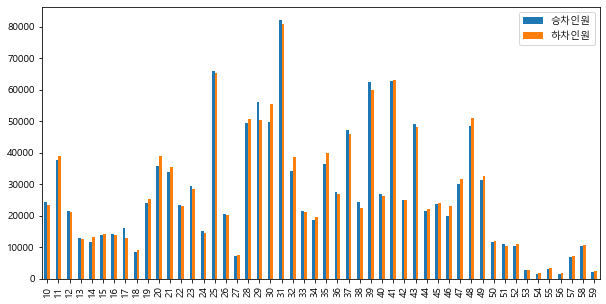

In [ ]:
# 바차트 그리기
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rc('figure', figsize=(15, 8))
# plt.figure(figsize=(12, 8))
plt.rcParams["figure.figsize"] = (10, 5)
_ = mline2.plot(kind='bar')

* 2호선 역별 승하차인원을 정렬하기 위해 '승하차인원' 열을 생성

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mline2['승하차인원'] = mline2['승차인원'] + mline2['하차인원']
mline2.tail()

,역이름,승차인원,하차인원,승하차인원
55,신설동,3197.0,3273.0,6470.0
56,도림천,1592.0,1687.0,3279.0
57,양천구청,6954.0,7271.0,14225.0
58,신정네거리,10479.0,10699.0,21178.0
59,용두(동대문구청),2307.0,2473.0,4780.0


* 2호선 역별 승하차인원 정렬해 상위 10등 출력

In [ ]:
rk10 = mline2.sort_values(by=['승하차인원'], ascending=[False]).head(10)
rk10

,역이름,승차인원,하차인원,승하차인원
31,강남,82104.0,80714.0,162818.0
25,잠실(송파구청),65893.0,65267.0,131160.0
41,구로디지털단지,62882.0,63151.0,126033.0
39,신림,62308.0,60029.0,122337.0
29,선릉,55920.0,50233.0,106153.0
30,역삼,49792.0,55407.0,105199.0
28,삼성(무역센터),49509.0,50812.0,100321.0
48,홍대입구,48622.0,50877.0,99499.0
43,신도림,48999.0,48114.0,97113.0
37,서울대입구(관악구청),47131.0,45992.0,93123.0


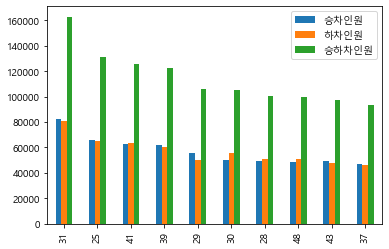

In [ ]:
plt.rcParams["figure.figsize"] = (6, 4)
_ = rk10.plot(kind='bar')

#### 세부 결과 `서울 지하철에서 특정일 2021년 4월 1일 2호선 역별 승하차인원 정보` 
    
>* **신도림(9위)**이 예상과는 달리 생각보다 승하차인원이 많지 않으며,
>* **강남(1위)**을 포함한 2호선(**잠실(2위) 등**)이 대부분 상위권을 차지하고 있으며,
>* 젊은이의 명소 **홍대입구(8위)**와 **서울대입구(10위)**가 상위권이며
>* 특히 젊은 직장인이 많은 **구로디지털단지(3위)**가 상위권임을 알 수 있음 

---

## 4-3 서울 지하철 전체에서 특정일 승하차인원이 가장 많은 상위 20개 알아보기
* 서울시 지하철 2021년 4월 1일 역별 승하차 인원 정보

In [ ]:
total = pd.read_csv('API_2021년4월1일_지하철역별일별_승하차인원.csv', encoding='ms949', index_col=0)
total.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210401,1호선,서울역,41201.0,38888.0,20210404
1,20210401,1호선,동묘앞,8727.0,9137.0,20210404
2,20210401,1호선,시청,21816.0,22115.0,20210404
3,20210401,1호선,종각,34502.0,33300.0,20210404
4,20210401,1호선,종로3가,25724.0,23189.0,20210404


* 환승역은 승차차인원 정보를 어떻게 구분할까? 
    * `신도림 역 등 여러 역이 통과하는 역은 몇개로 나뉨`
    * 모든 노선이 분리되어 표시되지는 않음, 신도림의 1호선은 없음

In [ ]:
total[total['SUB_STA_NM'] == '신도림']

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
43,20210401,2호선,신도림,48999.0,48114.0,20210404
336,20210401,경부선,신도림,4306.0,4127.0,20210404


* 왕십리는 역이름이 여러 개이므로 다음으로 검색, 4개로 구분 

In [ ]:
total[total['SUB_STA_NM'].str.contains('왕십리')]

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
16,20210401,2호선,상왕십리,14190.0,13783.0,20210404
17,20210401,2호선,왕십리(성동구청),16263.0,12913.0,20210404
150,20210401,5호선,왕십리(성동구청),4696.0,5148.0,20210404
374,20210401,경원선,왕십리(성동구청),13444.0,15307.0,20210404


* 고속터미널은 다음 3개로 구분 

In [ ]:
total[total['SUB_STA_NM'].str.contains('고속터미널')]

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
80,20210401,3호선,고속터미널,37060.0,35823.0,20210404
238,20210401,7호선,고속터미널,14629.0,12845.0,20210404
303,20210401,9호선,고속터미널,11594.0,14322.0,20210404


In [ ]:
total[total['SUB_STA_NM'].str.contains('강남')]
# total[total['SUB_STA_NM'].str.contains('선릉')]

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
29,20210401,2호선,선릉,55920.0,50233.0,20210404
486,20210401,분당선,선릉,13645.0,20147.0,20210404


* 주요 열(호선이름, 역이름. 승차인원, 하차인원)만 추출해서 열 이름 수정
* 역별 승하차인원을 정렬하기 위해 '승하차인원' 열을 생성

In [ ]:
total4 = total[['LINE_NUM', 'SUB_STA_NM', 'RIDE_PASGR_NUM', 'ALIGHT_PASGR_NUM']]
total4.columns = ['호선이름', '역이름', '승차인원', '하차인원']
total4['승하차인원'] = total4['승차인원'] + total4['하차인원']
total4.tail()

,호선이름,역이름,승차인원,하차인원,승하차인원
596,중앙선,오빈,309.0,316.0,625.0
597,중앙선,양평,2607.0,2700.0,5307.0
598,중앙선,원덕,427.0,421.0,848.0
599,중앙선,용문,1755.0,1819.0,3574.0
600,중앙선,지평,81.0,83.0,164.0


* 역별 승하차인원 정렬해 상위 10등 출력

In [ ]:
rk20 = total4.sort_values(by=['승하차인원'], ascending=[False]).head(20)
rk20

,호선이름,역이름,승차인원,하차인원,승하차인원
31,2호선,강남,82104.0,80714.0,162818.0
25,2호선,잠실(송파구청),65893.0,65267.0,131160.0
41,2호선,구로디지털단지,62882.0,63151.0,126033.0
39,2호선,신림,62308.0,60029.0,122337.0
29,2호선,선릉,55920.0,50233.0,106153.0
30,2호선,역삼,49792.0,55407.0,105199.0
28,2호선,삼성(무역센터),49509.0,50812.0,100321.0
48,2호선,홍대입구,48622.0,50877.0,99499.0
43,2호선,신도림,48999.0,48114.0,97113.0
250,7호선,가산디지털단지,47745.0,48594.0,96339.0


In [ ]:
rk20.to_csv('PREPRC_2021년4월1일_지하철역별일별_승하차인원_상위20.csv', encoding="ms949")
rk = pd.read_csv('PREPRC_2021년4월1일_지하철역별일별_승하차인원_상위20.csv', encoding="ms949", index_col=0)
rk

,호선이름,역이름,승차인원,하차인원,승하차인원
31,2호선,강남,82104.0,80714.0,162818.0
25,2호선,잠실(송파구청),65893.0,65267.0,131160.0
41,2호선,구로디지털단지,62882.0,63151.0,126033.0
39,2호선,신림,62308.0,60029.0,122337.0
29,2호선,선릉,55920.0,50233.0,106153.0
30,2호선,역삼,49792.0,55407.0,105199.0
28,2호선,삼성(무역센터),49509.0,50812.0,100321.0
48,2호선,홍대입구,48622.0,50877.0,99499.0
43,2호선,신도림,48999.0,48114.0,97113.0
250,7호선,가산디지털단지,47745.0,48594.0,96339.0


* 호선이름과 역이름을 인덱스로 수정

In [ ]:
rk20 = rk20.set_index(['호선이름', '역이름'])
rk20.tail()

승차인원     하차인원    승하차인원
호선이름 역이름                                  
2호선  성수          35692.0  38879.0  74571.0
     교대(법원.검찰청)  34310.0  38730.0  73040.0
경부선  영등포         35976.0  36983.0  72959.0
3호선  연신내         37593.0  35361.0  72954.0
     고속터미널       37060.0  35823.0  72883.0

* 역별 승하차인원 상위 20등 그림 그리기

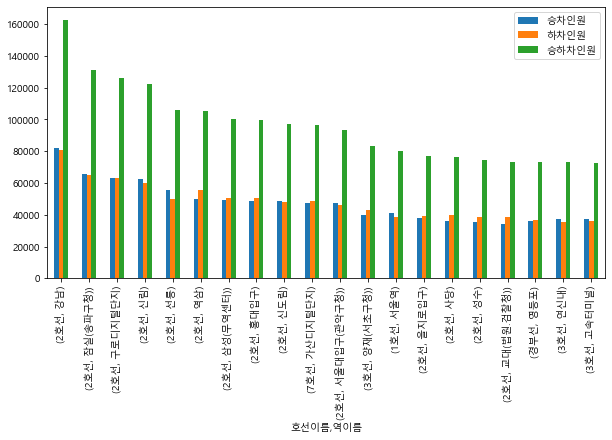

In [ ]:
# 바차트 그리기
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rc('figure', figsize=(15, 8))
# plt.figure(figsize=(12, 8))
plt.rcParams["figure.figsize"] = (10, 5)
_ = rk20.plot(kind='bar')

### 세부 결과 `서울 지하철 전체에서 특정일 승하차인원이 가장 많은 상위 20개 알아보기` 
    
>* **신도림(9위)**이 예상과는 달리 생각보다 승하차인원이 많지 않으며,
>* **강남(1위)**을 포함한 2호선(**잠실(2위) 등**)이 상위권을 많이 차지하고 있으며,
>* 젊은이의 명소 **홍대입구(8위)**가 상위권이고, **연신내(19위)**가 20권 이내이며 
>* 특히 젊은 직장인이 많은 **구로디지털단지(3위)**와 가산디지털단지(10위)**가 상위권임을 알 수 있음 

---

## 4-4 2015년에서 2020년까지 강남역의 승하차인원 변화 분석
> * 2015년에서 2020년까지 분기(2, 5, 8, 11월)마다 하루(분기월 1일)를 문자열로 생성해 API 호출
> * 데이터 및 오픈 API 호출 방식 참조
> * 서울열린데이터광장 `서울시 지하철호선별 역별 승하차 인원 정보` 
> * http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
> > 다음 두 개의 파일을 저장
> > * PREPRC_철도_2015-19년_분기별_승하차인원.csv
> > * PREPRC_2호선강남역_2015-19년_분기별_승하차인원.scv

* 여러 날짜로 서울시 지하철호선별 역별 승하차 인원 정보를 위한 URL 생성을 위한 함수 getURL 생성

In [ ]:
def getURL(date):
    #기초 데이터 입력
    valid_key = '자신의키를입력'
    start = 1 #가져올 시작 번호
    end = 1000 #가져올 끝 번호, 1000번 이상은 오류 발생
    #URL 주소 완성
    url = 'http://openapi.seoul.go.kr:8088/'
    url += valid_key + '/json/CardSubwayStatsNew/'
    url += str(start) + '/' + str(end) + '/' + date 
    return url

getURL('20210101')

'http://openapi.seoul.go.kr:8088/7a47797456676865313133704270746e/json/CardSubwayStatsNew/1/1000/20210101'

### 여러 날짜의 서울시 지하철호선별 역별 승하차 인원 정보를 위한 날짜 생성
* 여러 날짜가 저장된 리스트 dates를 생성
    * 2015년에서 2020년까지 분기(2, 5, 8, 11월)마다 하루(분기월 1일)를 문자열로 생성
        * '20150201', '20150501', '20150801', '20151101'

In [ ]:
dates = []
for i in range(2015, 2021):
    for j in range(2, 12, 3):
        dates.append(f'{i}{j:02d}01')
dates[:4]

['20150201', '20150501', '20150801', '20151101']

* 다음의 리스트 컴프리헨션으로도 가능

In [ ]:
[f'{i}{j:02d}01' for i in range(2015, 2021) for j in range(2, 12, 3)]

['20150201',
 '20150501',
 '20150801',
 '20151101',
 '20160201',
 '20160501',
 '20160801',
 '20161101',
 '20170201',
 '20170501',
 '20170801',
 '20171101',
 '20180201',
 '20180501',
 '20180801',
 '20181101',
 '20190201',
 '20190501',
 '20190801',
 '20191101',
 '20200201',
 '20200501',
 '20200801',
 '20201101']

In [ ]:
data = [f'{i}{j:02d}' for i in range(2) for j in range(10, 14, 2)]
data

['010', '012', '110', '112']

* 주소를 인자로 데이터프레임을 결과를 반환하는 함수 생성

In [ ]:
import urllib
import json
import pandas as pd

def getDataFrame(url):
    # url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")

    # 받은 데이터가 문자열이라서 이를 json으로 변환한다.
    json_object = json.loads(json_str)
    return pd.json_normalize(json_object['CardSubwayStatsNew']['row'])

* 먼저 2015년 2월 1일의 승하차 인원 정보 생성

In [ ]:
wholepart = getDataFrame(getURL(dates[0]))
print(dates[0])
wholepart.shape

20150201


(540, 6)

* 2015년~2020년의 분기별 승하차 인원 정보의 데이터프레임 생성

In [ ]:
whole = getDataFrame(getURL(dates[0]))
for date in dates[1:]:
    whole = whole.append(getDataFrame(getURL(date)))
whole

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20150201,1호선,서울역,51824.0,44842.0,20151217
1,20150201,1호선,시청,11431.0,11042.0,20151217
2,20150201,1호선,종각,24545.0,20570.0,20151217
3,20150201,1호선,종로3가,22864.0,20096.0,20151217
4,20150201,1호선,종로5가,13506.0,13308.0,20151217
...,...,...,...,...,...,...
593,20201101,중앙선,오빈,182.0,183.0,20201104
594,20201101,중앙선,양평,1974.0,1718.0,20201104
595,20201101,중앙선,원덕,305.0,259.0,20201104
596,20201101,중앙선,용문,2093.0,1650.0,20201104


- 주요 열만 추출하고 승차인원과 하차인원을 합한 승하차인원 열 생성

In [ ]:
whole6 = whole[['USE_DT', 'LINE_NUM', 'SUB_STA_NM', 'RIDE_PASGR_NUM', 'ALIGHT_PASGR_NUM']]
whole6.columns = ['날짜', '호선이름', '역이름', '승차인원', '하차인원']
whole6['승하차인원'] = whole6['승차인원'] + whole6['하차인원']
whole6.tail()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
593,20201101,중앙선,오빈,182.0,183.0,365.0
594,20201101,중앙선,양평,1974.0,1718.0,3692.0
595,20201101,중앙선,원덕,305.0,259.0,564.0
596,20201101,중앙선,용문,2093.0,1650.0,3743.0
597,20201101,중앙선,지평,40.0,17.0,57.0


* 파일에 저장

In [ ]:
whole6.to_csv('PREPRC_철도_2015-19년_분기별_승하차인원.csv', encoding="ms949")
df = pd.read_csv('PREPRC_철도_2015-19년_분기별_승하차인원.csv', encoding="ms949", index_col=0)
df.tail()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
593,20201101,중앙선,오빈,182.0,183.0,365.0
594,20201101,중앙선,양평,1974.0,1718.0,3692.0
595,20201101,중앙선,원덕,305.0,259.0,564.0
596,20201101,중앙선,용문,2093.0,1650.0,3743.0
597,20201101,중앙선,지평,40.0,17.0,57.0


* 승하차인원 상위 20위 랭킹

In [ ]:
rk20whole6 = whole6.sort_values(by=['승하차인원'], ascending=[False]).head(20)
rk20whole6

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
31,20190201,2호선,강남,121504.0,125405.0,246909.0
31,20170201,2호선,강남,124337.0,122448.0,246785.0
31,20180201,2호선,강남,122868.0,122015.0,244883.0
31,20170801,2호선,강남,118889.0,117491.0,236380.0
31,20160201,2호선,강남,117796.0,117567.0,235363.0
31,20190801,2호선,강남,116142.0,117443.0,233585.0
31,20191101,2호선,강남,113878.0,119625.0,233503.0
31,20180801,2호선,강남,117391.0,115817.0,233208.0
31,20160801,2호선,강남,116219.0,116626.0,232845.0
31,20181101,2호선,강남,109162.0,110057.0,219219.0


* 강남역의 승하차인원 변화

In [ ]:
kangnam = whole6[whole6['역이름'] == '강남']
kangnam

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
31,20150201,2호선,강남,54175.0,53316.0,107491.0
31,20150501,2호선,강남,86784.0,92226.0,179010.0
31,20150801,2호선,강남,76467.0,79973.0,156440.0
31,20151101,2호선,강남,53406.0,51675.0,105081.0
31,20160201,2호선,강남,117796.0,117567.0,235363.0
31,20160501,2호선,강남,53677.0,52728.0,106405.0
31,20160801,2호선,강남,116219.0,116626.0,232845.0
31,20161101,2호선,강남,101431.0,100257.0,201688.0
31,20170201,2호선,강남,124337.0,122448.0,246785.0
31,20170501,2호선,강남,75476.0,77007.0,152483.0


In [ ]:
whole6[whole6['역이름'].str.contains('강남')]

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
31,20150201,2호선,강남,54175.0,53316.0,107491.0
229,20150201,7호선,강남구청,9232.0,9685.0,18917.0
458,20150201,분당선,강남구청,3561.0,4158.0,7719.0
31,20150501,2호선,강남,86784.0,92226.0,179010.0
230,20150501,7호선,강남구청,13715.0,14826.0,28541.0
...,...,...,...,...,...,...
228,20200801,7호선,강남구청,7705.0,8577.0,16282.0
490,20200801,분당선,강남구청,4237.0,4911.0,9148.0
31,20201101,2호선,강남,34230.0,33253.0,67483.0
231,20201101,7호선,강남구청,5055.0,5570.0,10625.0


In [ ]:
whole6[(whole6['역이름'].str.contains('강남')) | (whole6['호선이름'] == '7호선') ]

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
31,20150201,2호선,강남,54175.0,53316.0,107491.0
208,20150201,7호선,장암,1387.0,987.0,2374.0
209,20150201,7호선,도봉산,9409.0,10068.0,19477.0
210,20150201,7호선,수락산,11553.0,11290.0,22843.0
211,20150201,7호선,마들,6750.0,6295.0,13045.0
...,...,...,...,...,...,...
257,20201101,7호선,상동,6413.0,6210.0,12623.0
258,20201101,7호선,삼산체육관,2190.0,2069.0,4259.0
259,20201101,7호선,굴포천,4144.0,4206.0,8350.0
260,20201101,7호선,부평구청,4558.0,3933.0,8491.0


In [ ]:
whole6[whole6['호선이름'] == '7호선']

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
208,20150201,7호선,장암,1387.0,987.0,2374.0
209,20150201,7호선,도봉산,9409.0,10068.0,19477.0
210,20150201,7호선,수락산,11553.0,11290.0,22843.0
211,20150201,7호선,마들,6750.0,6295.0,13045.0
212,20150201,7호선,노원,14506.0,15341.0,29847.0
...,...,...,...,...,...,...
256,20201101,7호선,부천시청,6047.0,6032.0,12079.0
257,20201101,7호선,상동,6413.0,6210.0,12623.0
258,20201101,7호선,삼산체육관,2190.0,2069.0,4259.0
259,20201101,7호선,굴포천,4144.0,4206.0,8350.0


In [ ]:
ym_kangnam = kangnam 
ym_kangnam['년도'] = ym_kangnam['날짜'].str[:4]
ym_kangnam['월일'] = ym_kangnam['날짜'].str[4:]
ym_kangnam.head()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원,년도,월일
31,20150201,2호선,강남,54175.0,53316.0,107491.0,2015,0201
31,20150501,2호선,강남,86784.0,92226.0,179010.0,2015,0501
31,20150801,2호선,강남,76467.0,79973.0,156440.0,2015,0801
31,20151101,2호선,강남,53406.0,51675.0,105081.0,2015,1101
31,20160201,2호선,강남,117796.0,117567.0,235363.0,2016,0201


* 파일에 저장

In [ ]:
ym_kangnam.to_csv('PREPRC_2호선강남역_2015-19년_분기별_승하차인원.csv', encoding="ms949")
df = pd.read_csv('PREPRC_2호선강남역_2015-19년_분기별_승하차인원.csv', encoding="ms949", index_col=0)
df.head()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원,년도,월일
31,20150201,2호선,강남,54175.0,53316.0,107491.0,2015,201
31,20150501,2호선,강남,86784.0,92226.0,179010.0,2015,501
31,20150801,2호선,강남,76467.0,79973.0,156440.0,2015,801
31,20151101,2호선,강남,53406.0,51675.0,105081.0,2015,1101
31,20160201,2호선,강남,117796.0,117567.0,235363.0,2016,201


* 강남역의 년도, 월별 승하차인원 정보 생성

In [ ]:
knst = kangnam[['년도', '월일', '승차인원', '하차인원', '승하차인원']]
knst = knst.set_index(['년도', '월일'])
knst

승차인원      하차인원     승하차인원
년도   월일                                
2015 0201   54175.0   53316.0  107491.0
     0501   86784.0   92226.0  179010.0
     0801   76467.0   79973.0  156440.0
     1101   53406.0   51675.0  105081.0
2016 0201  117796.0  117567.0  235363.0
     0501   53677.0   52728.0  106405.0
     0801  116219.0  116626.0  232845.0
     1101  101431.0  100257.0  201688.0
2017 0201  124337.0  122448.0  246785.0
     0501   75476.0   77007.0  152483.0
     0801  118889.0  117491.0  236380.0
     1101  105956.0  105288.0  211244.0
2018 0201  122868.0  122015.0  244883.0
     0501   79479.0   79475.0  158954.0
     0801  117391.0  115817.0  233208.0
     1101  109162.0  110057.0  219219.0
2019 0201  121504.0  125405.0  246909.0
     0501   77204.0   78025.0  155229.0
     0801  116142.0  117443.0  233585.0
     1101  113878.0  119625.0  233503.0
2020 0201   65598.0   69156.0  134754.0
     0501   50937.0   52351.0  103288.0
     0801   56649.0   58377.0  115026.0
     1101   34230.0   33253.0   67483.0

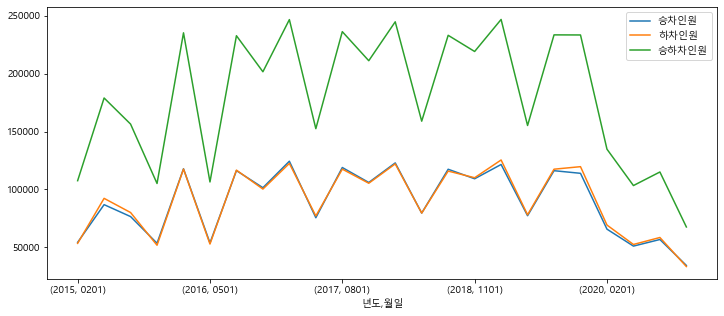

In [ ]:
# 차트 그리기
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5)
_ = knst.plot()

### 세부 결과
`승하차인원이 가장 많은 2호선 강남역의 2015년~20년 분기별 승하차인원  변화` 
    
>* 특정 날짜 2일 이므로 분기별 특성은 찾기 어렵고,
>* 2015년 이후 2016년에는 승하차인원이 많이 증가하였으나,
>* 2017년 이후엔 증가세가 둔화되었으며, 
>* 코로나 19로 인해 2020년에는 학실히 감소함을 알 수 있음 

---

### 4-5 유동인구가 가장 많은 강남역 2019년 1년 동안의 승하차인원 변화 분석
> 2019년 1년 전체에 대한 자료를 API를 통해 생성
> * 강남역은 2호선과 신분당선의 환승역이나 구분은 없음 

In [ ]:
whole2019 = pd.read_csv('API_서울지하철_2019년_일별_승하차인원.csv', encoding="ms949", index_col = 0)
whole2019.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20190101,1호선,서울역,39420.0,31121.0,20190104
1,20190101,1호선,시청,11807.0,10322.0,20190104
2,20190101,1호선,종각,20944.0,16658.0,20190104
3,20190101,1호선,종로3가,17798.0,15762.0,20190104
4,20190101,1호선,종로5가,13578.0,13282.0,20190104


* 2019년 승하차인원 정보 전체 데이터프레임 whole2019 생성
    * 다음은 시간이 많이 소요되므로 한번만 실행해 파일로 저장할 예정
        * 다음 코드는 실행하지 않아도 아래 파일 subway2019_pasgr_num.csv에 저장해 사용 가능 

In [ ]:
whole6_2019 = whole2019[['USE_DT', 'LINE_NUM', 'SUB_STA_NM', 'RIDE_PASGR_NUM', 'ALIGHT_PASGR_NUM']]
whole6_2019.columns = ['날짜', '호선이름', '역이름', '승차인원', '하차인원']
whole6_2019['승하차인원'] = whole6_2019['승차인원'] + whole6_2019['하차인원']
whole6_2019.tail()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
587,20191231,중앙선,오빈,283.0,281.0,564.0
588,20191231,중앙선,양평,2969.0,3287.0,6256.0
589,20191231,중앙선,원덕,347.0,348.0,695.0
590,20191231,중앙선,용문,1771.0,2059.0,3830.0
591,20191231,중앙선,지평,39.0,30.0,69.0


* 파일 PREPRC_2019년_도시철도_일별역별_승하차인원.csv에 저장

In [ ]:
whole6_2019.to_csv('PREPRC_2019년_도시철도_일별역별_승하차인원.csv', encoding="ms949")
df = pd.read_csv('PREPRC_2019년_도시철도_일별역별_승하차인원.csv', encoding="ms949", index_col=0)
df.head()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
0,20190101,1호선,서울역,39420.0,31121.0,70541.0
1,20190101,1호선,시청,11807.0,10322.0,22129.0
2,20190101,1호선,종각,20944.0,16658.0,37602.0
3,20190101,1호선,종로3가,17798.0,15762.0,33560.0
4,20190101,1호선,종로5가,13578.0,13282.0,26860.0


* 2019년 일별 역별 승하차인원 상위 20

In [ ]:
rk20whole6_2019 = whole6_2019.sort_values(by=['승하차인원'], ascending=[False]).head(20)
rk20whole6_2019

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
31,20190111,2호선,강남,132727.0,137826.0,270553.0
31,20191220,2호선,강남,130261.0,139424.0,269685.0
31,20190125,2호선,강남,131976.0,136614.0,268590.0
31,20190118,2호선,강남,130864.0,136701.0,267565.0
31,20190712,2호선,강남,130396.0,136116.0,266512.0
31,20190719,2호선,강남,130905.0,135498.0,266403.0
31,20190705,2호선,강남,130664.0,135633.0,266297.0
31,20190215,2호선,강남,129941.0,135541.0,265482.0
31,20190104,2호선,강남,129878.0,134948.0,264826.0
25,20190504,2호선,잠실(송파구청),122249.0,139617.0,261866.0


* 2019년 전체 강남역의 승하차인원 변화

In [ ]:
kangnam2019 = whole6_2019[whole6_2019['역이름'] == '강남']
kangnam2019.tail(31)

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원
31,20191201,2호선,강남,51432.0,50641.0,102073.0
31,20191202,2호선,강남,104761.0,106181.0,210942.0
31,20191203,2호선,강남,108049.0,107835.0,215884.0
31,20191204,2호선,강남,107628.0,109175.0,216803.0
31,20191205,2호선,강남,111432.0,113032.0,224464.0
31,20191206,2호선,강남,118557.0,125483.0,244040.0
31,20191207,2호선,강남,89934.0,97653.0,187587.0
31,20191208,2호선,강남,52378.0,51419.0,103797.0
31,20191209,2호선,강남,104260.0,105620.0,209880.0
31,20191210,2호선,강남,108064.0,109291.0,217355.0


In [ ]:
ym_kangnam2019 = kangnam2019 
ym_kangnam2019['날짜'] = ym_kangnam2019['날짜'].astype(str)
ym_kangnam2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 31 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   호선이름    365 non-null    object 
 2   역이름     365 non-null    object 
 3   승차인원    365 non-null    float64
 4   하차인원    365 non-null    float64
 5   승하차인원   365 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.0+ KB


In [ ]:
ym_kangnam2019['월'] = ym_kangnam2019['날짜'].str[4:6]
ym_kangnam2019['일'] = ym_kangnam2019['날짜'].str[6:]
ym_kangnam2019.head()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원,월,일
31,20190101,2호선,강남,38729.0,36544.0,75273.0,01,01
31,20190102,2호선,강남,116550.0,116482.0,233032.0,01,02
31,20190103,2호선,강남,122254.0,122889.0,245143.0,01,03
31,20190104,2호선,강남,129878.0,134948.0,264826.0,01,04
31,20190105,2호선,강남,90030.0,95814.0,185844.0,01,05


* 파일 PREPRC_2019년_2호선강남역_일별역별_승하차인원.csv에 저장

In [ ]:
ym_kangnam2019.to_csv('PREPRC_2019년_2호선강남역_일별역별_승하차인원.csv', encoding="ms949")
df = pd.read_csv('PREPRC_2019년_2호선강남역_일별역별_승하차인원.csv', encoding="ms949", index_col=0)
df.head()

,날짜,호선이름,역이름,승차인원,하차인원,승하차인원,월,일
31,20190101,2호선,강남,38729.0,36544.0,75273.0,1,1
31,20190102,2호선,강남,116550.0,116482.0,233032.0,1,2
31,20190103,2호선,강남,122254.0,122889.0,245143.0,1,3
31,20190104,2호선,강남,129878.0,134948.0,264826.0,1,4
31,20190105,2호선,강남,90030.0,95814.0,185844.0,1,5


* 월별 승하차인원 그리기

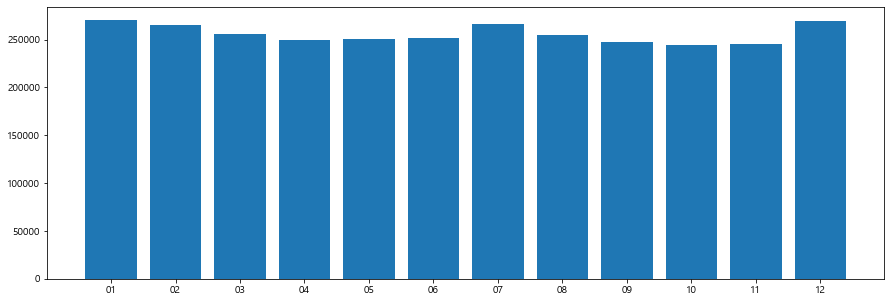

In [ ]:
# 차트 그리기
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 5)
_ = plt.bar(ym_kangnam2019['월'], ym_kangnam2019['승하차인원'])

* 그림을 그리기 위해 인덱스 조정

In [ ]:
knst2019 = ym_kangnam2019[['월', '일', '승하차인원']]
knst2019 = knst2019.set_index(['월', '일'])
knst2019

승하차인원
월  일           
01 01   75273.0
   02  233032.0
   03  245143.0
   04  264826.0
   05  185844.0
...         ...
12 27  256147.0
   28  191564.0
   29  118033.0
   30  237298.0
   31  210773.0

[365 rows x 1 columns]

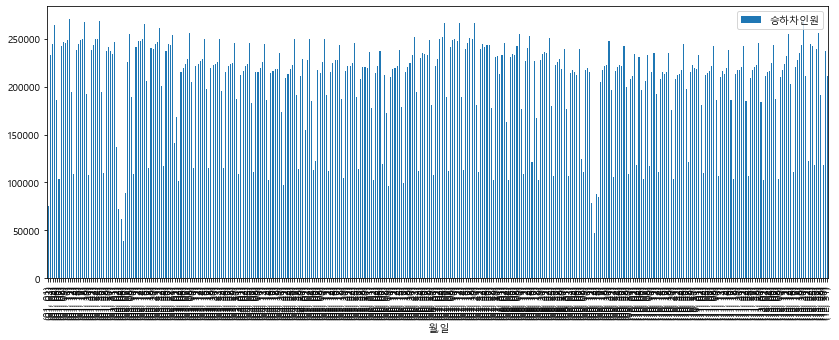

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14, 5)
_ = knst2019.plot.bar()

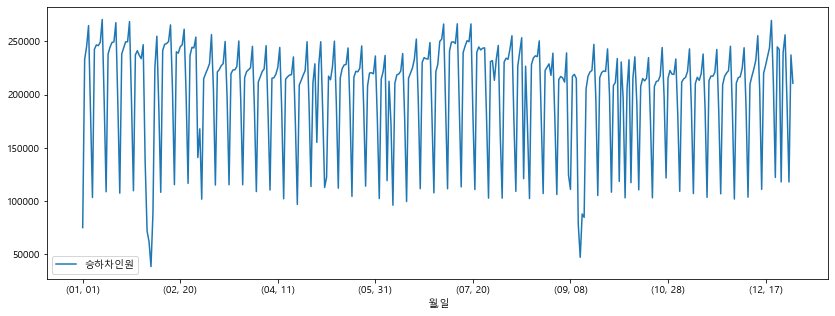

In [ ]:
plt.rcParams["figure.figsize"] = (14, 5)
_ = knst2019.plot()

* 강남역의 승하차인원이 많은 날과 적은 날 확인

In [ ]:
knst2019.sort_values(by=['승하차인원'], ascending=[False]).head(10)

승하차인원
월  일           
01 11  270553.0
12 20  269685.0
01 25  268590.0
   18  267565.0
07 12  266512.0
   19  266403.0
   05  266297.0
02 15  265482.0
01 04  264826.0
02 22  261456.0

In [ ]:
knst2019.sort_values(by=['승하차인원'], ascending=[False]).tail(10)

승하차인원
월  일          
06 09  96230.0
02 06  88577.0
09 14  88032.0
   15  84845.0
   12  78226.0
01 01  75273.0
02 03  71930.0
   04  62038.0
09 13  47385.0
02 05  38646.0

### 데이터분석 결과: `가장 유동인구가 많은 강남역 2019년 1년 동안의 승하차인원 변화 분석`
> * 1월, 7월 12월의 승차차인원이 가장 많음
> * 2019년 1월 11일의 승하차인원이 가장 많음
> * 설날인 2019년 2월 5일의 승하차인원이 가장 적음

---

### 4-6 서울의 대표 지하철인 2호선 역사의 지도 시각화를 위한 데이터 가공
   

- 역사를 서울 지도에 그리기 위해 역사의 데이터 저장 후 위도, 경도 등의 주요 데이터 추출 

* 공공데이터포털에서 전국도시철도역사정보 표준데이터 다운로드 
    * 역사 정보는 자주 수정되는 자료가 아니므로 직접 파일로 다운로드
        * DOWNLOAD_전국도시철도_역사정보_표준데이터.csv
        * https://www.data.go.kr/data/15013205/standard.do

#### 다운로드한 역사의 위치 정보 확인
* 파일 DOWNLOAD_서울교통공사_도시철도역사정보.csv 읽어 확인

In [ ]:
import pandas as pd
station = pd.read_csv('DOWNLOAD_서울교통공사_도시철도역사정보.csv', encoding='ms949')
station.head()

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,150,서울역,S1101,서울 도시철도 1호선,Seoul Station,首爾站,환승역,S1104+I4107,서울 도시철도 4호선+경의중앙선,37.555753,126.972456,서울교통공사,서울특별시 중구 세종대로 지하 2 (남대문로 5가),02-6110-1331,2021-04-09
1,151,시청,S1101,서울 도시철도 1호선,City Hall,市廳,환승역,S1102,서울 도시철도 2호선,37.564717,126.976751,서울교통공사,서울특별시 중구 세종대로 지하 101 (정동),02-6110-1321,2021-04-09
2,152,종각,S1101,서울 도시철도 1호선,Jonggak,鐘閣,일반역,NaN,NaN,37.570203,126.982948,서울교통공사,서울특별시 종로구 종로 지하 55 (종로1가),02-6110-1311,2021-04-09
3,153,종로3가,S1101,서울 도시철도 1호선,Jongno 3(sam)-ga,鍾路三街,환승역,S1103+S1105,서울 도시철도 3호선+서울 도시철도 5호선,37.571394,126.991411,서울교통공사,서울특별시 종로구 종로 지하 129 (종로3가),02-6110-1301,2021-04-09
4,154,종로5가,S1101,서울 도시철도 1호선,Jongno 5(o)-ga,鐘路五街,일반역,NaN,NaN,37.571007,127.001799,서울교통공사,서울특별시 종로구 종로 지하 216 (종로5가),02-6110-1291,2021-04-09


* 2호선의 역사 정보만을 추출해 파일로 저장

In [ ]:
station[['역사명', '역위도', '역경도', '역사도로명주소']].head()

,역사명,역위도,역경도,역사도로명주소
0,서울역,37.555753,126.972456,서울특별시 중구 세종대로 지하 2 (남대문로 5가)
1,시청,37.564717,126.976751,서울특별시 중구 세종대로 지하 101 (정동)
2,종각,37.570203,126.982948,서울특별시 종로구 종로 지하 55 (종로1가)
3,종로3가,37.571394,126.991411,서울특별시 종로구 종로 지하 129 (종로3가)
4,종로5가,37.571007,127.001799,서울특별시 종로구 종로 지하 216 (종로5가)


* 2호선 역사의 정보 추출

In [ ]:
stan2line = station[station['노선명'].str.contains('2호선')]
stan2line.shape

(51, 15)

In [ ]:
stan2line = stan2line[['역사명', '역위도', '역경도', '역사도로명주소']]
stan2line.head()

,역사명,역위도,역경도,역사도로명주소
10,까치산,37.531684,126.846743,서울특별시 강서구 강서로 지하54(화곡동)
11,시청,37.564619,126.976086,서울특별시 중구 세종대로 지하 101 (정동)
12,을지로입구,37.565977,126.982504,서울특별시 중구 을지로 지하 42 (을지로1가)
13,을지로3가,37.566348,126.991482,서울특별시 중구 을지로 지하 106 (을지로3가)
14,을지로4가,37.566828,126.997902,서울특별시 중구 을지로 지하 178 (을지로4가)


* 지하철 2호선 역사 주요 정보 파일로 저장

In [ ]:
stan2line.to_csv('PREPRC_서울교통공사_2호선_주요_도시철도역사정보.csv', encoding='ms949')

In [ ]:
import pandas as pd
df = pd.read_csv('PREPRC_서울교통공사_2호선_주요_도시철도역사정보.csv', encoding='ms949', index_col = 0) 
df.shape

(51, 4)

In [ ]:
# 자료 확인
df.head()

,역사명,역위도,역경도,역사도로명주소
10,까치산,37.531684,126.846743,서울특별시 강서구 강서로 지하54(화곡동)
11,시청,37.564619,126.976086,서울특별시 중구 세종대로 지하 101 (정동)
12,을지로입구,37.565977,126.982505,서울특별시 중구 을지로 지하 42 (을지로1가)
13,을지로3가,37.566348,126.991482,서울특별시 중구 을지로 지하 106 (을지로3가)
14,을지로4가,37.566828,126.997902,서울특별시 중구 을지로 지하 178 (을지로4가)


- - -

## 4-7 서울지하철 2호선의 2019년 승하차인원 정보 지도 시각화를 위한 데이터 가공
   - 서울의 대표 지하철인 2호선 역의 2019년 1년 동안의 승하차인원 합을 원으로 시각화
   - 특히 승하차인원 연인원이 4천만명이 넘는 역은 붉은색으로 표시 
   - 역사명이 표시되며, 클릭하면 승하차인원 연인원 표시

* 먼저 전체 위에서 API로 얻은 2019년 일별 승하차인원에서 2호서의 승하차 정보만 추출해서 저장

In [ ]:
import pandas as pd

whole2019 = pd.read_csv('API_서울지하철_2019년_일별_승하차인원.csv', encoding="ms949", index_col = 0)
whole2019.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20190101,1호선,서울역,39420.0,31121.0,20190104
1,20190101,1호선,시청,11807.0,10322.0,20190104
2,20190101,1호선,종각,20944.0,16658.0,20190104
3,20190101,1호선,종로3가,17798.0,15762.0,20190104
4,20190101,1호선,종로5가,13578.0,13282.0,20190104


* 끼치산 역이 2호선과 5호선의 환승역인데 2호선으로만 표기되어 있어서 강제로 추가가 필요함

In [ ]:
whole2019[whole2019['SUB_STA_NM'] == '까치산']

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
128,20190101,5호선,까치산,14189.0,14419.0,20190104
128,20190102,5호선,까치산,32594.0,31232.0,20190105
128,20190103,5호선,까치산,33345.0,31695.0,20190106
127,20190104,5호선,까치산,34282.0,32151.0,20190107
128,20190105,5호선,까치산,24446.0,23358.0,20190108
...,...,...,...,...,...,...
128,20191227,5호선,까치산,35242.0,32861.0,20191230
127,20191228,5호선,까치산,26113.0,24491.0,20191231
127,20191229,5호선,까치산,19127.0,18417.0,20200101
128,20191230,5호선,까치산,33520.0,31766.0,20200102


* 먼저 까치산을 포함한 2호선 모두 추가 

In [ ]:
pasg2line = whole2019[ (whole2019['SUB_STA_NM'] == '까치산') | (whole2019['LINE_NUM'] == '2호선') ]
pasg2line

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
10,20190101,2호선,시청,8381.0,6049.0,20190104
11,20190101,2호선,을지로입구,22478.0,21330.0,20190104
12,20190101,2호선,을지로3가,8104.0,7554.0,20190104
13,20190101,2호선,을지로4가,3862.0,3728.0,20190104
14,20190101,2호선,동대문역사문화공원,10995.0,11808.0,20190104
...,...,...,...,...,...,...
56,20191231,2호선,도림천,1222.0,1236.0,20200103
57,20191231,2호선,양천구청,7240.0,7389.0,20200103
58,20191231,2호선,신정네거리,9973.0,10112.0,20200103
59,20191231,2호선,용두(동대문구청),2623.0,2552.0,20200103


* 2호선 역사만 추출해 주요 열 추출 후, 열 이름 변경

In [ ]:
pasg2line = pasg2line[['USE_DT', 'LINE_NUM', 'SUB_STA_NM', 'RIDE_PASGR_NUM', 'ALIGHT_PASGR_NUM']]
pasg2line.columns = ['날짜', '호선이름', '역이름', '승차인원', '하차인원']
pasg2line.head()

,날짜,호선이름,역이름,승차인원,하차인원
10,20190101,2호선,시청,8381.0,6049.0
11,20190101,2호선,을지로입구,22478.0,21330.0
12,20190101,2호선,을지로3가,8104.0,7554.0
13,20190101,2호선,을지로4가,3862.0,3728.0
14,20190101,2호선,동대문역사문화공원,10995.0,11808.0


* 서울지하철 2호선 2019년 일별 승하차인원 저장

In [ ]:
import pandas as pd

pasg2line.to_csv('PREPRC_2019년_서울지하철2호선_일별_승하차인원.csv', encoding='ms949')
df = pd.read_csv('PREPRC_2019년_서울지하철2호선_일별_승하차인원.csv', encoding='ms949', index_col = 0) 
df.shape

(18615, 5)

* 역별 연인원의 합 구하기
    * groupby() 활용

In [ ]:
grp = pasg2line.groupby('역이름')
pasg2line = grp[['승차인원', '하차인원']].sum()
pasg2line.head()

,승차인원,하차인원
역이름,,
강남,36432679.0,37197520.0
강변(동서울터미널),16518779.0,16278790.0
건대입구,16162917.0,17712483.0
교대(법원.검찰청),13206666.0,15025521.0
구로디지털단지,22948410.0,22946305.0


* 다시 index를 열로 이동

In [ ]:
pasg2line = pasg2line.reset_index()
pasg2line.head()

,역이름,승차인원,하차인원
0,강남,36432679.0,37197520.0
1,강변(동서울터미널),16518779.0,16278790.0
2,건대입구,16162917.0,17712483.0
3,교대(법원.검찰청),13206666.0,15025521.0
4,구로디지털단지,22948410.0,22946305.0


* 역이름 확인

In [ ]:
pasg2line['역이름'].value_counts()

동대문역사문화공원      1
서울대입구(관악구청)    1
낙성대            1
아현             1
신촌             1
신설동            1
시청             1
합정             1
을지로입구          1
양천구청           1
서초             1
대림(구로구청)       1
왕십리(성동구청)      1
역삼             1
뚝섬             1
봉천             1
잠실새내           1
을지로3가          1
영등포구청          1
용답             1
교대(법원.검찰청)     1
잠실나루           1
방배             1
사당             1
홍대입구           1
신정네거리          1
충정로(경기대입구)     1
잠실(송파구청)       1
까치산            1
종합운동장          1
강변(동서울터미널)     1
구의(광진구청)       1
용두(동대문구청)      1
당산             1
신답             1
건대입구           1
삼성(무역센터)       1
신대방            1
신도림            1
강남             1
신림             1
을지로4가          1
도림천            1
이대             1
성수             1
상왕십리           1
선릉             1
한양대            1
문래             1
구로디지털단지        1
신당             1
Name: 역이름, dtype: int64

In [ ]:
len(pasg2line['역이름'].value_counts())

51

* pasg2line에는 역이름에 부이름인 괄호가 들어가나, 역사 정보의 데이터프레임과 맞추기 위해 동일한 역사명을 추가
        * 예: '강변(동서울터미널)'을 '강변'으로 열 역사명에 추가
        * 다음으로 강변만 획득

In [ ]:
# pasg2line['역이름'].str.split('(')[0] 
pasg2line['역이름'].str.split('(').str[0] 

0            강남
1            강변
2          건대입구
3            교대
4       구로디지털단지
5            구의
6           까치산
7           낙성대
8            당산
9            대림
10          도림천
11    동대문역사문화공원
12           뚝섬
13           문래
14           방배
15           봉천
16           사당
17           삼성
18         상왕십리
19        서울대입구
20           서초
21           선릉
22           성수
23           시청
24           신답
25           신당
26          신대방
27          신도림
28           신림
29          신설동
30        신정네거리
31           신촌
32           아현
33         양천구청
34           역삼
35        영등포구청
36          왕십리
37           용답
38           용두
39        을지로3가
40        을지로4가
41        을지로입구
42           이대
43           잠실
44         잠실나루
45         잠실새내
46        종합운동장
47          충정로
48          한양대
49           합정
50         홍대입구
Name: 역이름, dtype: object

In [ ]:
pasg2line['역사명'] = pasg2line['역이름'].str.split('(').str[0] 
pasg2line.head()

,역이름,승차인원,하차인원,역사명
0,강남,36432679.0,37197520.0,강남
1,강변(동서울터미널),16518779.0,16278790.0,강변
2,건대입구,16162917.0,17712483.0,건대입구
3,교대(법원.검찰청),13206666.0,15025521.0,교대
4,구로디지털단지,22948410.0,22946305.0,구로디지털단지


* 가공된 pasg2line 데이터프레임 저장 후, 다시 열어 확인 

In [ ]:
pasg2line.to_csv('PREPRC_2호선역_2019년승하차_총인원.csv', encoding='ms949')
df = pd.read_csv('PREPRC_2호선역_2019년승하차_총인원.csv', encoding='ms949', index_col = 0)
df.head()

,역이름,승차인원,하차인원,역사명
0,강남,36432679.0,37197520.0,강남
1,강변(동서울터미널),16518779.0,16278790.0,강변
2,건대입구,16162917.0,17712483.0,건대입구
3,교대(법원.검찰청),13206666.0,15025521.0,교대
4,구로디지털단지,22948410.0,22946305.0,구로디지털단지


* 까치산 역 재확인

In [ ]:
pasg2line[pasg2line['역이름'].str.contains('까치산')]

,역이름,승차인원,하차인원,역사명
6,까치산,11090457.0,10515718.0,까치산


### 2호선 역의 위도, 경도, 주소 등의 정보 저장
* 승하차 정보와 주소, 위도 경도 등의 위치 정보를 하나의 데이터프레임으로 생성
    * 두 데이터프레임을 공통인 '역의 이름' 조인
        * stan2line: 역정보, pasg2line: 승하차정보

* 위에서 저장한 2호선 위치 정보 읽기
    * 역이름 확인

In [ ]:
stan2line = pd.read_csv('PREPRC_서울교통공사_2호선_주요_도시철도역사정보.csv', encoding='ms949', index_col = 0)
stan2line.head()

,역사명,역위도,역경도,역사도로명주소
10,까치산,37.531684,126.846743,서울특별시 강서구 강서로 지하54(화곡동)
11,시청,37.564619,126.976086,서울특별시 중구 세종대로 지하 101 (정동)
12,을지로입구,37.565977,126.982505,서울특별시 중구 을지로 지하 42 (을지로1가)
13,을지로3가,37.566348,126.991482,서울특별시 중구 을지로 지하 106 (을지로3가)
14,을지로4가,37.566828,126.997902,서울특별시 중구 을지로 지하 178 (을지로4가)


* 괄호가 들어간 역이름이 두 데이터프레임(pasg2line, stan2line)에서 불일치
    * pasg2line에는 역이름에 부이름인 괄호가 들어감
        * 예: 강변(동서울터미널)

In [ ]:
pasg2line.head()

,역이름,승차인원,하차인원,역사명
0,강남,36432679.0,37197520.0,강남
1,강변(동서울터미널),16518779.0,16278790.0,강변
2,건대입구,16162917.0,17712483.0,건대입구
3,교대(법원.검찰청),13206666.0,15025521.0,교대
4,구로디지털단지,22948410.0,22946305.0,구로디지털단지


In [ ]:
print(pasg2line.shape, stan2line.shape)

(51, 4) (51, 4)


* 두 데이터프레임에서 공통 열인 '역사명'으로 두 데이터프레임을 합침
    * 먼저 how='outer' 조인을 수행
    * http://www.gisdeveloper.co.kr/?p=8255

In [ ]:
mdf = pd.merge(pasg2line, stan2line, how='outer')
mdf.tail()

,역이름,승차인원,하차인원,역사명,역위도,역경도,역사도로명주소
46,종합운동장,4787807.0,5370971.0,종합운동장,37.511061,127.073542,서울특별시 송파구 올림픽로 지하 23 (잠실동)
47,충정로(경기대입구),3974231.0,4224311.0,충정로,37.560228,126.963450,서울특별시 서대문구 서소문로 지하 17 (충정로3가)
48,한양대,4047639.0,4597634.0,한양대,37.555222,127.043492,서울특별시 성동구 왕십리로 206 (행당동)
49,합정,12386835.0,13267402.0,합정,37.549599,126.914124,서울특별시 마포구 양화로 지하 55 (서교동)
50,홍대입구,29477443.0,31645053.0,홍대입구,37.557015,126.924983,서울특별시 마포구 양화로 지하160 (동교동)


* 다시 inner 조인 수행

In [ ]:
mdf = pd.merge(pasg2line, stan2line)
mdf.tail()

,역이름,승차인원,하차인원,역사명,역위도,역경도,역사도로명주소
46,종합운동장,4787807.0,5370971.0,종합운동장,37.511061,127.073542,서울특별시 송파구 올림픽로 지하 23 (잠실동)
47,충정로(경기대입구),3974231.0,4224311.0,충정로,37.560228,126.963450,서울특별시 서대문구 서소문로 지하 17 (충정로3가)
48,한양대,4047639.0,4597634.0,한양대,37.555222,127.043492,서울특별시 성동구 왕십리로 206 (행당동)
49,합정,12386835.0,13267402.0,합정,37.549599,126.914124,서울특별시 마포구 양화로 지하 55 (서교동)
50,홍대입구,29477443.0,31645053.0,홍대입구,37.557015,126.924983,서울특별시 마포구 양화로 지하160 (동교동)


* 계산을 편리하게 하기 위해 승차인원과 하차인원을 합한 열 승하차인원 생성 

In [ ]:
mdf['승하차인원'] = mdf['승차인원'] + mdf['하차인원']
mdf['승하차인원'] = mdf['승하차인원'].astype(int)
mdf.head()

,역이름,승차인원,하차인원,역사명,역위도,역경도,역사도로명주소,승하차인원
0,강남,36432679.0,37197520.0,강남,37.497202,127.028054,서울특별시 강남구 강남대로 지하 396 (역삼동),73630199
1,강변(동서울터미널),16518779.0,16278790.0,강변,37.534877,127.094694,서울특별시 광진구 강변역로 53 (구의동),32797569
2,건대입구,16162917.0,17712483.0,건대입구,37.540609,127.070063,서울특별시 광진구 아차산로 243 (화양동),33875400
3,교대(법원.검찰청),13206666.0,15025521.0,교대,37.493201,127.014224,서울특별시 서초구 서초대로 지하 294 (서초동),28232187
4,구로디지털단지,22948410.0,22946305.0,구로디지털단지,37.485162,126.901485,서울특별시 구로구 도림천로 477 (구로동),45894715


* 파일에 저장하기 위해 정비

In [ ]:
stan_pasg2line = mdf[['역사명', '역이름', '승차인원', '하차인원', '승하차인원', '역위도', '역경도', '역사도로명주소']]
stan_pasg2line.head()

,역사명,역이름,승차인원,하차인원,승하차인원,역위도,역경도,역사도로명주소
0,강남,강남,36432679.0,37197520.0,73630199,37.497202,127.028054,서울특별시 강남구 강남대로 지하 396 (역삼동)
1,강변,강변(동서울터미널),16518779.0,16278790.0,32797569,37.534877,127.094694,서울특별시 광진구 강변역로 53 (구의동)
2,건대입구,건대입구,16162917.0,17712483.0,33875400,37.540609,127.070063,서울특별시 광진구 아차산로 243 (화양동)
3,교대,교대(법원.검찰청),13206666.0,15025521.0,28232187,37.493201,127.014224,서울특별시 서초구 서초대로 지하 294 (서초동)
4,구로디지털단지,구로디지털단지,22948410.0,22946305.0,45894715,37.485162,126.901485,서울특별시 구로구 도림천로 477 (구로동)


In [ ]:
import pandas as pd
stan_pasg2line.to_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949')
df = pd.read_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949', index_col = 0)
df.head()

,역사명,역이름,승차인원,하차인원,승하차인원,역위도,역경도,역사도로명주소
0,강남,강남,36432679.0,37197520.0,73630199,37.497202,127.028054,서울특별시 강남구 강남대로 지하 396 (역삼동)
1,강변,강변(동서울터미널),16518779.0,16278790.0,32797569,37.534877,127.094694,서울특별시 광진구 강변역로 53 (구의동)
2,건대입구,건대입구,16162917.0,17712483.0,33875400,37.540609,127.070063,서울특별시 광진구 아차산로 243 (화양동)
3,교대,교대(법원.검찰청),13206666.0,15025521.0,28232187,37.493201,127.014224,서울특별시 서초구 서초대로 지하 294 (서초동)
4,구로디지털단지,구로디지털단지,22948410.0,22946305.0,45894715,37.485162,126.901485,서울특별시 구로구 도림천로 477 (구로동)


* 서울 2호선 지하철 역의 2019년 연간 '승하차인원' 상위 10위 

In [ ]:
mdf.sort_values(by=['승하차인원'], ascending=[False])[['역이름', '승하차인원']].head(10)

,역이름,승하차인원
0,강남,73630199
43,잠실(송파구청),62143927
50,홍대입구,61122496
28,신림,50650459
4,구로디지털단지,45894715
17,삼성(무역센터),44148760
27,신도림,42866134
19,서울대입구(관악구청),38227932
21,선릉,37226411
41,을지로입구,36859039


#### 세부 결과 `서울지하철 2호선의 2019년 승하차인원 정보 지도 시각화`

> * 지하철 2호선 역 위치에 2019년 1년 동안의 승하차 전체 인원을 원의 크기로 시각화
> * 2019년 승하차인원이 년 4천만명이상이면 붉은색으로 이하이면 녹색으로 시각화
> * 위치에서 역이름이 표시되며, 클릭하면 승하차인원 연인원 표시 시각화
> * 그릴 위치의 평균 값의 위도, 경도를 지정해서 그리기

In [ ]:
import folium

# 그릴 위치의 평균 값의 위도, 경도를 지정헤서 그리기
map = folium.Map(location=[37.42, 127.02], zoom_start=12, tiles='Stamen Toner')
map

In [ ]:
import folium

# 그릴 위치의 평균 값의 위도, 경도를 지정헤서 그리기
map = folium.Map(location=[mdf['역위도'].mean(), mdf['역경도'].mean()], zoom_start=12,
#                  tiles='Stamen Toner')
                 tiles='Cartodb Positron')

# 역 위치에 2019년 승하차인원 정보를 원의 크기로 시각화
for n in mdf.index:
    color = 'red' if  mdf['승하차인원'][n] >= 40000000 else 'green' 
    
    pstr = '승하차인원: '  + str(mdf['승하차인원'][n]) + '명'
    popup = folium.Popup(
        pstr, min_width=150, max_width=400
    )
    folium.Marker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        icon = folium.Icon(color = color), # 붉은색 아이콘으로
        tooltip = mdf['역사명'][n] # 위치로 이동하면 역이름 출력
    ).add_to(map) 
    
    # 승하차인원이 년 4천만명이상 이면 붉은색, 이라면 녹색으로
    folium.CircleMarker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        popup = popup, # 위치를 클릭하면 
        radius = mdf['승하차인원'][n]/1000000, 
        color=color, fill_color='skyblue', fill=True
    ).add_to(map)

map

#### 세부 결과 `서울지하철 2호선의 2019년 승하차인원 정보 지도 시각화`

> * 지하철 2호선 역 위치에 2019년 1년 동안의 승하차 전체 인원을 원의 크기로 시각화
> * 2019년 승하차인원이 년 4천만명이상이면 붉은색으로 이하이면 녹색으로 시각화
> * 위치에서 역이름이 표시되며, 클릭하면 승하차인원 연인원 표시 시각화

---

### 4-8 서울지하철 2호선과 상권정보 분석
> ## `서울지하철 2호선 역사 중심의 상권정보 지도 시각화`
    > * 서울의 대표 지하철인 2호선 역사 위치 반경 500미터 내의 상권정보 시각화
    > * 상권정보는 지역을 그림으로 표시하며, 마우스를 클릭하면 상권면적을 표시 
    > > * 공공데이터포털에서 상권정보를 활용
    > > * https://www.data.go.kr/index.do
    > > * 위도, 경도에 따른 반경내 상권정보 공공API 활용
    > > https://www.data.go.kr/data/15012005/openapi.do

#### 공공데이터포털에서 지하철 2호선 모든 역사 [경도, 위도] 기준 반경 500미터 상권정보 공공 API 호출해 상권정보 생성


- 2호선 역사의 위치와 승하차인원 정보 활용
    - 파일명: `PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv`
    - 열명 ['역사명', '승하차인원', '역위도', '역경도'] 만 저장한 데이터프레임 geo_line2 활용

- 2호선 모든 역의 위치로 500m 반경내 상권정보를 하나의 데이터프레임과 파일에 저장
    - 파일명: `PREPRC_지하철2호선_역위치_상권정보(면적과 위치).csv`

- 2호선에서 500m 반경내 상권이 있는 역의 역사와 면적, 위치정보 파일에 저장
    - 파일명: `PREPRC_지하철2호선_역사명_상권면적총합_위도경도.csv`

- 이이 저장된 파일에서 2호선정보 읽기

In [ ]:
import pandas as pd
line2 = pd.read_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949', index_col = 0) 
geo_line2 = line2[['역사명', '승하차인원', '역위도', '역경도']]
geo_line2.head()

,역사명,승하차인원,역위도,역경도
0,강남,73630199,37.497202,127.028054
1,강변,32797569,37.534877,127.094694
2,건대입구,33875400,37.540609,127.070063
3,교대,28232187,37.493201,127.014224
4,구로디지털단지,45894715,37.485162,126.901485


* 2호선 역의 위치 정보로 상권정보를 모두 가져 오기 
    * 공공API를 위한 [위도, 경도] 위치를 인자로 URL 생성하는 함수를 만들어 테스크 

In [ ]:
def getURL(geo):   
    # 받은 서비스키 저장
    ServiceKey = '자신의키를입력'
    #URL 주소 완성
    url = 'http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius?'
    rad = 500 #반경 500m
    typ = 'json' # json, 아예 제거하면 xml 형식 
    url += f'radius={rad}&cx={geo[0]}&cy={geo[1]}&type={typ}&ServiceKey={ServiceKey}'
    return url

loc = [127.028054, 37.497202] # [경도, 위도] 
getURL([loc[0], loc[1]])

'http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneInRadius?radius=500&cx=127.028054&cy=37.497202&type=json&ServiceKey=0ZK%2FAhy%2F4X44%2BkuhZYKo0Rwf9%2BFQM0D3UAorf%2FTERn%2BzUPv7%2BYOBfbp71I8iLfA4URBF9%2BXQbb0AuD42UHqT8Q%3D%3D'

- 2호선 전체 역의 역사 정보를 가져오기 위한 데이터프레임 생성
    - 한 역 위치로 상권정보 반환 함수 작성

In [ ]:
import urllib
import json
import pandas as pd

def getDataFrame(sname, url): # 역사명과 url
    # url을 불러오고 이것을 인코딩을 utf-8로 전환하여 결과를 받자.
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")

    # 받은 데이터가 문자열이라서 이를 json으로 변환한다.
    json_object = json.loads(json_str)
    df = pd.json_normalize(json_object['body']['items'])
    # 역에 따라 상권정보가 없는 역을 처리 
    if df.empty:
        return df # 다음을 처리하면 오류가 나므로 
    df.columns = ['상권번호', '상권명', '시도코드', '시도명', '시군구코드', '시군구명', '면적', '좌표개수', '좌표값', '데이터기준일자']
    df= df[['상권번호', '상권명', '면적', '좌표개수', '좌표값']]
    df['역사명'] = sname
    return df

- 강남역으로 공공API를 호출하는 함수 getDataFrame 테스트

In [ ]:
kangnam_ca = getDataFrame('강남', getURL([loc[0], loc[1]]))
kangnam_ca

,상권번호,상권명,면적,좌표개수,좌표값,역사명
0,1923,서울 강남구 강남역_2,158325.0,13,"POLYGON ((127.024688 37.503738, 127.024397 37....",강남
1,1887,서울 강남구 강남역_1,117740.3,20,"POLYGON ((127.02782 37.497182, 127.027744 37.4...",강남
2,1893,서울 강남구 강남역,167613.1,34,"POLYGON ((127.03033 37.495439, 127.030553 37.4...",강남


- 지하철 2호선 모든 역사명와 [위도, 경도] 정보가 저장된 데이터프레임 geo_line2
    - 상권정보를 모두 저장한 comm_areas_all 데이터프레임 생성 

In [ ]:
# 이셀의 모든 스스를 선택하고 (ctrl + /)를 누르면 주석 생성 및 제거(toggle 가능), 약 1~3분 소요
comm_areas_all = getDataFrame( geo_line2['역사명'][0], getURL([geo_line2['역경도'][0], geo_line2['역위도'][0]]) )

for i in range(1, len(geo_line2)):
    dum_df = getDataFrame( geo_line2['역사명'][i], getURL([geo_line2['역경도'][i], geo_line2['역위도'][i]]) )
    if not dum_df.empty:
        comm_areas_all = comm_areas_all.append(dum_df)
comm_areas_all.tail()

,상권번호,상권명,면적,좌표개수,좌표값,역사명
0,1970,잠실역 롯데월드,142737.8,10,"POLYGON ((127.098732 37.510076, 127.099296 37....",잠실
1,1985,잠실역,94192.5,16,"POLYGON ((127.103458 37.516454, 127.103228 37....",잠실
0,1962,신천역,191932.0,15,"POLYGON ((127.085442 37.511513, 127.079976 37....",잠실새내
0,2166,서울 마포구 홍대입구역_2,39523.1,15,"POLYGON ((126.92268 37.557772, 126.923255 37.5...",홍대입구
1,2167,서울 마포구 홍대입구역_3,40530.9,15,"POLYGON ((126.925403 37.558195, 126.925651 37....",홍대입구


In [ ]:
# 이셀의 모든 스스를 선택하고 (ctrl + /)를 누르면 주석 생성 및 제거(toggle 가능), 약 1~3분 소요

pieces = []

for i in range(len(geo_line2)):
    dum_df = getDataFrame( geo_line2['역사명'][i], getURL([geo_line2['역경도'][i], geo_line2['역위도'][i]]) )
    if not dum_df.empty:
        pieces.append(dum_df)

comm_areas_all = pd.concat(pieces, ignore_index=True)      
comm_areas_all.tail()

,상권번호,상권명,면적,좌표개수,좌표값,역사명
75,1970,잠실역 롯데월드,142737.8,10,"POLYGON ((127.098732 37.510076, 127.099296 37....",잠실
76,1985,잠실역,94192.5,16,"POLYGON ((127.103458 37.516454, 127.103228 37....",잠실
77,1962,신천역,191932.0,15,"POLYGON ((127.085442 37.511513, 127.079976 37....",잠실새내
78,2166,서울 마포구 홍대입구역_2,39523.1,15,"POLYGON ((126.92268 37.557772, 126.923255 37.5...",홍대입구
79,2167,서울 마포구 홍대입구역_3,40530.9,15,"POLYGON ((126.925403 37.558195, 126.925651 37....",홍대입구


- 데이터프레임 comm_areas_all에서 index 제거하고 파일에 저장

In [ ]:
comm_areas_all = comm_areas_all.reset_index().drop(['index'], axis=1)
comm_areas_all.to_csv('PREPRC_지하철2호선_역위치_상권정보(면적과 위치).csv', encoding='ms949')
comm_areas_all.tail()

,상권번호,상권명,면적,좌표개수,좌표값,역사명
75,1970,잠실역 롯데월드,142737.8,10,"POLYGON ((127.098732 37.510076, 127.099296 37....",잠실
76,1985,잠실역,94192.5,16,"POLYGON ((127.103458 37.516454, 127.103228 37....",잠실
77,1962,신천역,191932.0,15,"POLYGON ((127.085442 37.511513, 127.079976 37....",잠실새내
78,2166,서울 마포구 홍대입구역_2,39523.1,15,"POLYGON ((126.92268 37.557772, 126.923255 37.5...",홍대입구
79,2167,서울 마포구 홍대입구역_3,40530.9,15,"POLYGON ((126.925403 37.558195, 126.925651 37....",홍대입구


- 파일에서 읽어와 데이터프레임 comm_areas에 간단히 4개의 열만 저장

In [ ]:
comm_areas = pd.read_csv('PREPRC_지하철2호선_역위치_상권정보(면적과 위치).csv', encoding='ms949', index_col = 0)
comm_areas = comm_areas[['역사명', '상권명', '면적', '좌표값']]
comm_areas.tail()

,역사명,상권명,면적,좌표값
75,잠실,잠실역 롯데월드,142737.8,"POLYGON ((127.098732 37.510076, 127.099296 37...."
76,잠실,잠실역,94192.5,"POLYGON ((127.103458 37.516454, 127.103228 37...."
77,잠실새내,신천역,191932.0,"POLYGON ((127.085442 37.511513, 127.079976 37...."
78,홍대입구,서울 마포구 홍대입구역_2,39523.1,"POLYGON ((126.92268 37.557772, 126.923255 37.5..."
79,홍대입구,서울 마포구 홍대입구역_3,40530.9,"POLYGON ((126.925403 37.558195, 126.925651 37...."


- groupby() 사용해 2호선 역사의 상권면적 합 구하기 

In [ ]:
comm_areas[comm_areas['역사명'] == '삼성']

,역사명,상권명,면적,좌표값
22,삼성,코엑스,218417.4,"POLYGON ((127.060661 37.508194, 127.062988 37...."
23,삼성,삼성역_3,87017.6,"POLYGON ((127.064546 37.509384, 127.066389 37...."
24,삼성,삼성역_2,60702.6,"POLYGON ((127.06571 37.507121, 127.066414 37.5..."
25,삼성,삼성역_1,145936.7,"POLYGON ((127.064082 37.506909, 127.06308 37.5..."


In [ ]:
comm_areas.groupby(['역사명']).sum().head()

,면적
역사명,
강남,443678.4
강변,32501.3
건대입구,190550.2
교대,478606.2
구의,75574.6


In [ ]:
comm_areas_sum = comm_areas.groupby(['역사명']).sum().sort_values(by = '면적', ascending=False)
comm_areas_sum = comm_areas_sum.reset_index()
comm_areas_sum.head()

,역사명,면적
0,삼성,512074.3
1,역삼,500030.0
2,선릉,499815.4
3,을지로3가,499062.6
4,교대,478606.2


In [ ]:
geo_line2.head()

,역사명,승하차인원,역위도,역경도
0,강남,73630199,37.497202,127.028054
1,강변,32797569,37.534877,127.094694
2,건대입구,33875400,37.540609,127.070063
3,교대,28232187,37.493201,127.014224
4,구로디지털단지,45894715,37.485162,126.901485


- 두 개의 데이터프레임을 합병해 [역사명, 면적, 승하차인원, 역위도, 역경도] 정보 파일로 저장

In [ ]:
mdf = pd.merge(comm_areas_sum, geo_line2)
mdf.to_csv('PREPRC_지하철2호선_역사명_상권면적총합_위도경도.csv', encoding='ms949')
mdf.tail()

,역사명,면적,승하차인원,역위도,역경도
27,홍대입구,80054.0,61122496,37.557015,126.924983
28,구의,75574.6,17402001,37.536919,127.085730
29,강변,32501.3,32797569,37.534877,127.094694
30,상왕십리,29870.8,10345645,37.564171,127.029352
31,신정네거리,22644.0,7404403,37.519997,126.852899


In [ ]:
mdf = pd.read_csv('PREPRC_지하철2호선_역사명_상권면적총합_위도경도.csv', encoding='ms949', index_col = 0)
mdf.tail()

,역사명,면적,승하차인원,역위도,역경도
27,홍대입구,80054.0,61122496,37.557015,126.924983
28,구의,75574.6,17402001,37.536919,127.085730
29,강변,32501.3,32797569,37.534877,127.094694
30,상왕십리,29870.8,10345645,37.564171,127.029352
31,신정네거리,22644.0,7404403,37.519997,126.852899


- 지하철 2호선 역사(파란색의 팔각형) 중심의 상권(다각형)을 지도에 시각화
    - 지도에 역사명 주의를 클릭하면 다음과 같이 유동인구와 상권정보 표시
    - 역사 500미터 근방의 상권면적인 300,000(제곱미터) 이상이면 붉은색, 아니면 녹색 원으로 시각화
    - ![option](comm_area.png)

- 모든 상권을 그릴 모든 다각형 정보의 리스트 pgs를 생성 

In [ ]:
# 데이터프레임의 모든 좌표를 저장한 리스트
pgs = []
for i in range(len(comm_areas)):
    pts = comm_areas['좌표값'][i][8:][2:-2].replace(',', '').split(' ')
    lines = [ [ float(pts[i+1]), float(pts[i]) ] for i in range(0, len(pts), 2) ]
    pgs.append(lines)
len(pgs)
pgs

[[[37.503738, 127.024688],
  [37.504339, 127.024397],
  [37.503385, 127.021232],
  [37.502855, 127.021499],
  [37.503069, 127.022265],
  [37.501938, 127.022777],
  [37.502143, 127.0236],
  [37.49893, 127.025214],
  [37.498403, 127.023513],
  [37.497066, 127.024209],
  [37.497458, 127.025855],
  [37.497984, 127.027398],
  [37.503738, 127.024688]],
 [[37.497182, 127.02782],
  [37.497352, 127.027744],
  [37.497649, 127.026907],
  [37.496857, 127.024348],
  [37.496248, 127.024638],
  [37.496489, 127.02543],
  [37.496432, 127.025557],
  [37.496323, 127.025509],
  [37.49608, 127.024718],
  [37.495304, 127.025088],
  [37.495799, 127.026667],
  [37.494147, 127.027454],
  [37.493894, 127.026609],
  [37.49299, 127.027049],
  [37.493124, 127.027509],
  [37.493217, 127.027464],
  [37.493335, 127.027843],
  [37.492595, 127.028197],
  [37.493086, 127.029803],
  [37.497182, 127.02782]],
 [[37.495439, 127.03033],
  [37.495082, 127.030553],
  [37.494956, 127.030141],
  [37.494956, 127.030141],
  [37.49

In [ ]:
import folium
cols = ['gray', 'blue', 'green', 'purple', 'maroon', 'gold', 'skyblue', 'red', 'yellow', 'magenta']
cols += ['brown', 'teal', 'cyan', 'orange', 'aqua', 'pink', 'greybrown', 'darkgray', 'black', 'navy']
center = [mdf['역위도'].mean(), mdf['역경도'].mean()] # 평균 위치 
map = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron') # tiles='Stamen Toner'

j = 0
for i in range(len(pgs)):
    if (i == 0):
        color = cols[0]
        j += 1
    if (i != 0) and (comm_areas['역사명'][i] != comm_areas['역사명'][i-1]):
        color = cols[j % len(cols)]
        j += 1
        
    folium.Polygon(
        locations = pgs[i],
        fill = True,
        tooltip = comm_areas['역사명'][i],
        color = color
        # weight = 2.5, width = .1
    ).add_to(map)

for n in range(len(geo_line2)):
    folium.RegularPolygonMarker(
        [geo_line2['역위도'][n], geo_line2['역경도'][n]], 
        tooltip = geo_line2['역사명'][n],
        number_of_sides = 8, 
        radius = 4
    ).add_to(map) 

for n in range(len(mdf)):
    # 500미터 근방의 상권면적인 300,000(제곱미터) 이상이면 붉은색, 아니면 녹색으로
    color = 'red' if  mdf['면적'][n] >= 300000 else 'green' 
    s = '역명: ' + mdf['역사명'][n] 
    s += '<br> 2019년 일 평균승하차인원: ' + str(int(mdf['승하차인원'][n]/365)) + '(명)' 
    s += '<br> 상권면적: ' + str(int(mdf['면적'][n])) + '(제곱미터)' 
    popup = folium.Popup(
        s, 
        min_width=200, max_width=400
    )
    folium.CircleMarker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        radius = mdf['면적'][n]/20000, 
        color=color,
        fill_color='skyblue',
        popup = popup, # 위치를 클릭하면 
        fill=True
    ).add_to(map)

map

#### 세부 결과 `서울지하철 2호선 역사 중심의 상권정보 지도 시각화`

> * 서울 지하철2호선 역에서 강남역과 시청 및 을지로 중심의 상권정보가 크며, 이는 유동인구와의 관계성이 매우 큰 것으로 분석
> * 지하철 2호선 강남 중심의 역사 위치가 상권이 집중화 된 것을 확인 
> * 지하철 2호선 강북 시청 및 을지로를 중심으로 한 기존 상권이 여전히 집중화 된 것을 확인 
> * 아직 홍대입구의 상권정보가 공공데이터에 반영이 되지 않은 듯 함

---

# (5) 분석 결과 도출

## 5-1. 2021년 4월 지하철2호선 시간대별 승하차인원 분석
- 2021년 4월 지하철2호선 시간대별 승차인원 히트맵
  > - 출근 시 승차인원이 많은 역: 
       - 잠실과 신림 역 근처: 주택이 많은 지역으로 예측
  > - 퇴근 시 승차인원이 많은 역: 
       -  을지로 입구, 성수, 강남, 구로디지털단지 등: 사무실이 많은 지역으로 예측
  > - 승차와 하차를 구분해 유동인원이 많은 역과 시간대의 색상이 더 짙은 파란색 

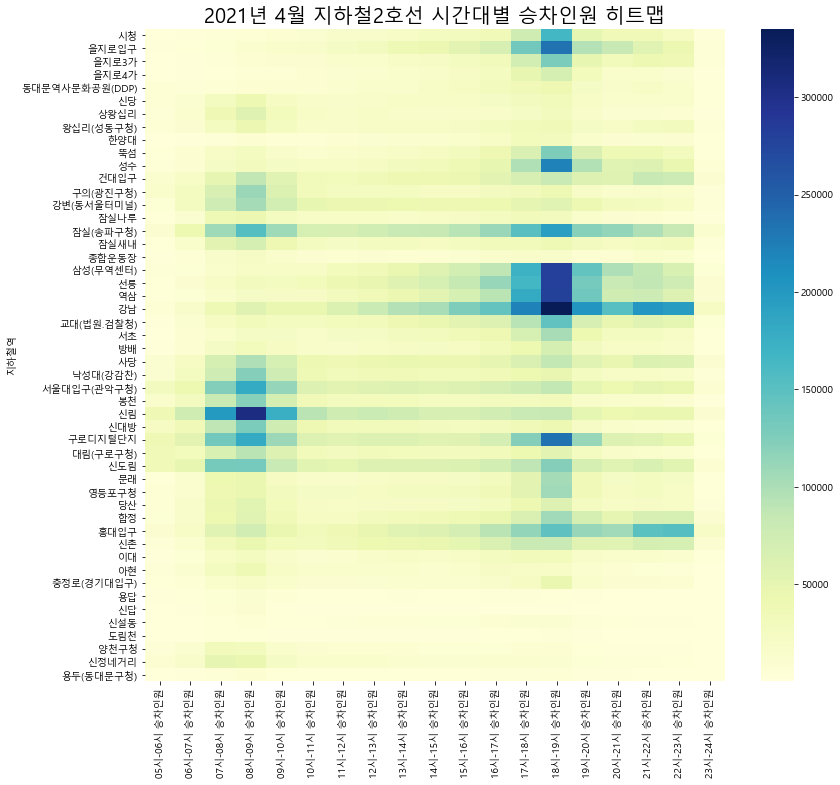

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

ride_line2 = pd.read_csv('PREPRC_지하철2호선_2019년4월_주요시간별_승차인원.csv', encoding='ms949', index_col=0)

plt.rcParams["figure.figsize"] = (13, 12)
plt.title('2021년 4월 지하철2호선 시간대별 승차인원 히트맵', fontsize=20)
# sns.heatmap(hour_line2, cmap='RdYlGn_r')
sns.heatmap(ride_line2, cmap='YlGnBu')
plt.show() 

- 2021년 4월 지하철2호선 시간대별 하차인원 히트맵: 승차인원과 반대
    - 출근 시 하차인원이 많은 역:
         - 을지로 입구, 성수, 강남, 구로디지털단지 등: 사무실이 많은 지역으로 예측
    - 퇴근 시 하차인원이 많은 역: 
         - 잠실과 신림 근처 등 고르게 분포: 주택이 많은 지역으로 예측 

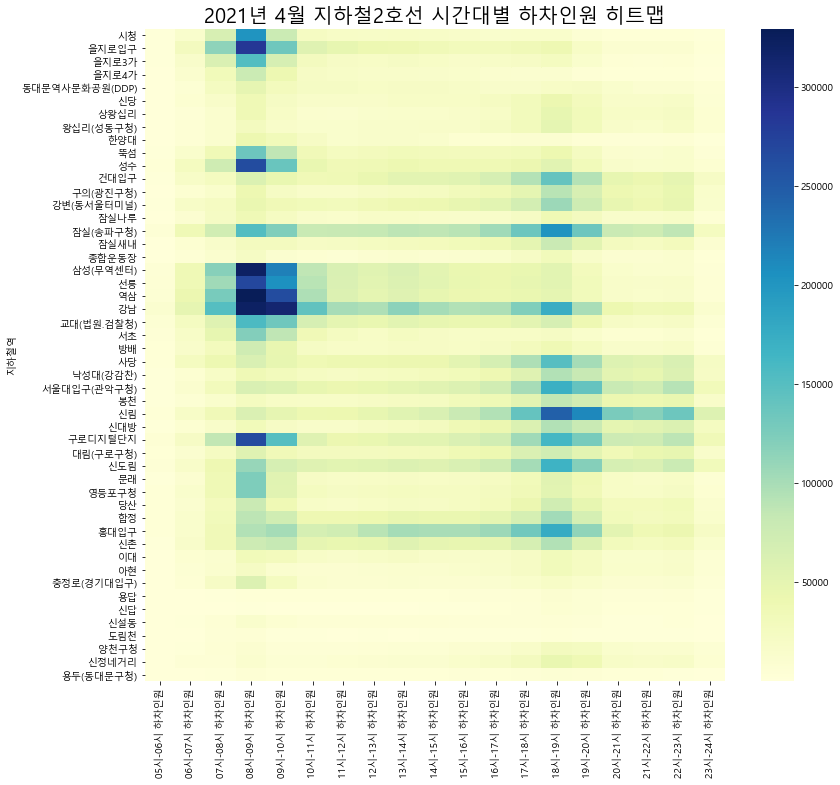

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

alight_line2 = pd.read_csv('PREPRC_지하철2호선_2019년4월_주요시간별_하차인원.csv', encoding='ms949', index_col=0)
plt.rcParams["figure.figsize"] = (13, 12)
plt.title('2021년 4월 지하철2호선 시간대별 하차인원 히트맵', fontsize=20)
sns.heatmap(alight_line2, cmap='YlGnBu')
plt.show() 

## 5-2. 서울 지하철에서 특정일 2021년 4월 1일 2호선 역별 승하차인원 정보 
    
> * **신도림(9위)**이 예상과는 달리 생각보다 승하차인원이 많지 않으며,
> * **강남(1위)**을 포함한 2호선(**잠실(2위) 등**)이 대부분 상위권을 차지하고 있으며,
> * 젊은이의 명소 **홍대입구(8위)**와 **서울대입구(10위)**가 상위권이며
> * 특히 젊은 직장인이 많은 **구로디지털단지(3위)**가 상위권임을 알 수 있음 

* 2021년 4월 1일 2호선 역별 승하차인원 그림 그리기

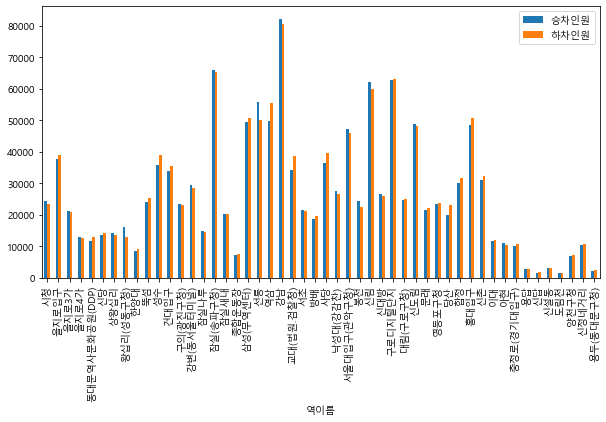

In [ ]:
import pandas as pd
mline2 = pd.read_csv('PREPRC_지하철2호선_2019년4월1일_승하차인원.csv', encoding='ms949', index_col=0)
mline2 = mline2.set_index('역이름')

# 바차트 그리기
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rc('figure', figsize=(15, 8))
# plt.figure(figsize=(12, 8))
plt.rcParams["figure.figsize"] = (10, 5)
_ = mline2.plot(kind='bar')

* 2호선 역별 승하차인원을 정렬하기 위해 '승하차인원' 열을 생성

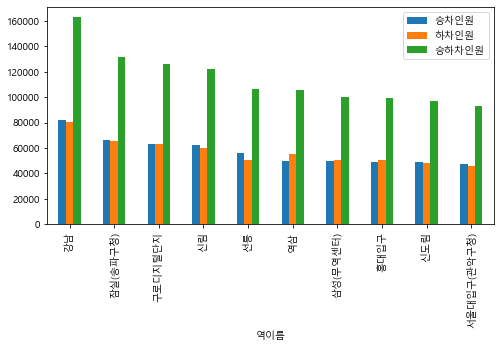

In [ ]:
mline2['승하차인원'] = mline2['승차인원'] + mline2['하차인원']
rk10 = mline2.sort_values(by=['승하차인원'], ascending=[False]).head(10)
plt.rcParams["figure.figsize"] = (8, 4)
_ = rk10.plot(kind='bar')

## 5-3. 서울 지하철 전체에서 특정일 승하차인원이 가장 많은 상위 20개 분석 
>* **신도림(9위)**이 예상과는 달리 생각보다 승하차인원이 많지 않으며,
>* **강남(1위)**을 포함한 2호선(**잠실(2위) 등**)이 상위권을 많이 차지하고 있으며,
>* 젊은이의 명소 **홍대입구(8위)**가 상위권이고, **연신내(19위)**가 20권 이내이며 
>* 특히 젊은 직장인이 많은 **구로디지털단지(3위)**와 가산디지털단지(10위)**가 상위권임을 알 수 있음 

* 역별 승하차인원 상위 20등 그림 그리기

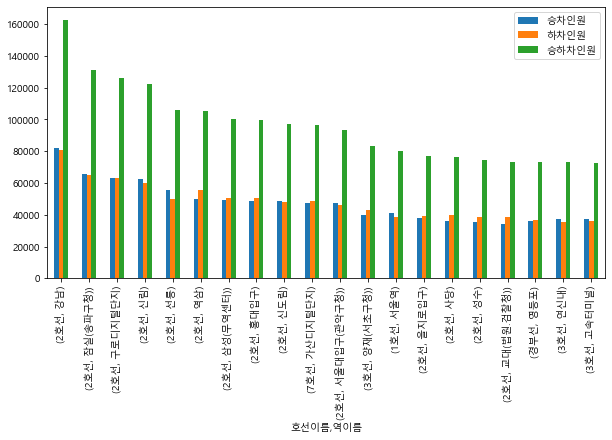

In [ ]:
rk20 = pd.read_csv('PREPRC_2021년4월1일_지하철역별일별_승하차인원_상위20.csv', encoding="ms949", index_col=0)
rk20 = rk20.set_index(['호선이름', '역이름'])

# 바차트 그리기
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rc('figure', figsize=(15, 8))
# plt.figure(figsize=(12, 8))
plt.rcParams["figure.figsize"] = (10, 5)
_ = rk20.plot(kind='bar')

## 5-3. 승하차인원이 가장 많은 2호선 강남역의 2015년~20년 분기별 승하차인원  변화 분석 
>* 특정 날짜 2일 이므로 분기별 특성은 찾기 어렵고,
>* 2015년 이후 2016년에는 승하차인원이 많이 증가하였으나,
>* 2017년 이후엔 증가세가 둔화되었으며, 
>* 코로나 19로 인해 2020년에는 학실히 감소함을 알 수 있음 

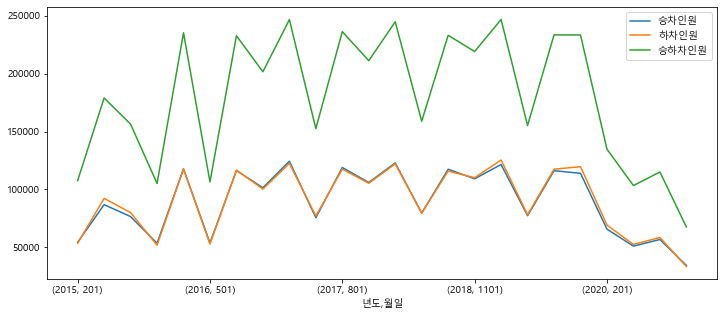

In [ ]:
kangnam = pd.read_csv('PREPRC_2호선강남역_2015-19년_분기별_승하차인원.csv', encoding="ms949", index_col=0)
knst = kangnam[['년도', '월일', '승차인원', '하차인원', '승하차인원']]
knst = knst.set_index(['년도', '월일'])

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5)
_ = knst.plot()

## 5-4. 가장 유동인구가 많은 강남역 2019년 1년 동안의 승하차인원 변화 분석 
> * 1월, 7월 12월의 승차차인원이 가장 많음
> * 2019년 1월 11일의 승하차인원이 가장 많음
> * 설날인 2019년 2월 5일의 승하차인원이 가장 적음

* 월별 승하차인원 그리기

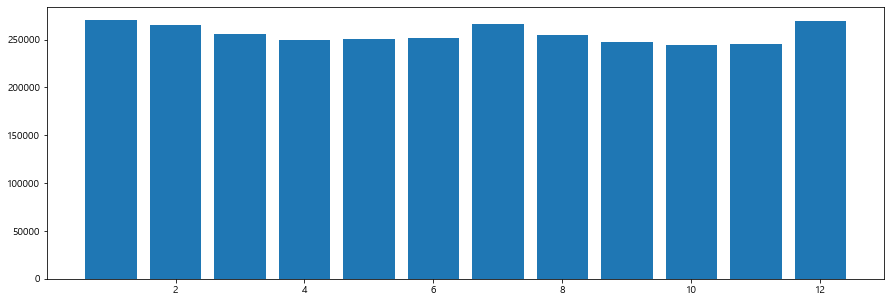

In [ ]:
ym_kangnam2019 = pd.read_csv('PREPRC_2019년_2호선강남역_일별역별_승하차인원.csv', encoding="ms949", index_col=0)

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = (15, 5)
_ = plt.bar(ym_kangnam2019['월'], ym_kangnam2019['승하차인원'])

* 2019년 1년간 강남역 승하차인원 변화

In [ ]:
knst2019 = ym_kangnam2019[['월', '일', '승하차인원']]
knst2019 = knst2019.set_index(['월', '일'])
knst2019

승하차인원
월  일           
1  1    75273.0
   2   233032.0
   3   245143.0
   4   264826.0
   5   185844.0
...         ...
12 27  256147.0
   28  191564.0
   29  118033.0
   30  237298.0
   31  210773.0

[365 rows x 1 columns]

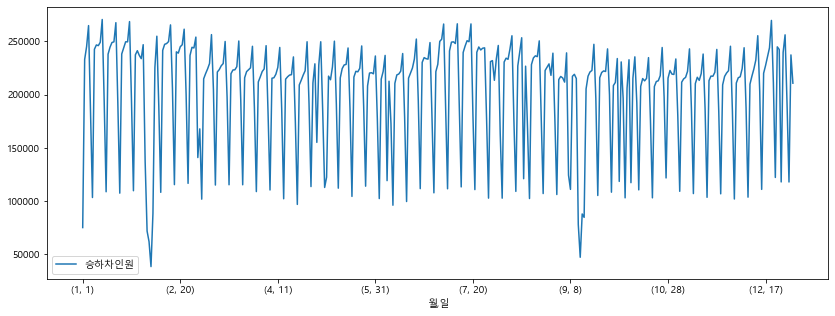

In [ ]:
plt.rcParams["figure.figsize"] = (14, 5)
_ = knst2019.plot()

## 5-5. 서울의 대표 지하철인 2호선의 역사를 지도 시각화
> * 역사의 위도, 경도는 공공데이터포털에서 다운로드
> * 서울 지하철 2호선 자료로 추출
> * 지도 시각화 도구인 folium 설치 필요
> * 위도, 경도로 folium을 사용해 지도 시각화

In [ ]:
import pandas as pd
df = pd.read_csv('PREPRC_서울교통공사_2호선_주요_도시철도역사정보.csv', encoding='ms949', index_col = 0) 
stan2line = df

In [ ]:
import folium
map = folium.Map(location=[37.53, 126.98], zoom_start=12, tiles='Stamen Terrain')

# 역 위치 지정
for n in stan2line.index:
    folium.Marker( [stan2line['역위도'][n], stan2line['역경도'][n]], 
                   popup = stan2line['역사도로명주소'][n], # 위치를 클릭하면 
                   tooltip = stan2line['역사명'][n]
                 ).add_to(map) # 위치로 이동하면
map

## 5-6. 서울지하철 2호선의 2019년 승하차인원 정보 지도 시각화
> * 지하철 2호선 역 위치에 2019년 1년 동안의 승하차 전체 인원을 원의 크기로 시각화
> * 2019년 승하차인원이 년 4천만명 이상이면 붉은색으로 이하이면 녹색으로 시각화
> * 강남, 잠실, 홍대입구, 신림, 구로디지털단지, 삼성, 신도림 순으로 4천만명 이상
> * 위치에서 역이름이 표시되며, 클릭하면 승하차인원 연인원 표시 시각화

In [ ]:
import pandas as pd
mdf = pd.read_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949', index_col = 0)

import folium
# 그릴 위치의 평균 값의 위도, 경도를 지정헤서 그리기
map = folium.Map(location=[mdf['역위도'].mean(), mdf['역경도'].mean()], zoom_start=12, tiles='Stamen Toner')

# 역 위치에 2019년 승하차인원 정보를 원의 크기로 시각화
for n in mdf.index:
    color = 'red' if  mdf['승하차인원'][n] >= 40000000 else 'green' 
    
    pstr = mdf['역사명'][n] + ' 승하차인원: '  + str(mdf['승하차인원'][n]) + '명'
    popup = folium.Popup(
        pstr, min_width=150, max_width=400
    )
    
    folium.Marker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        icon = folium.Icon(color = color), # 붉은색 아이콘으로
        tooltip = mdf['역사명'][n] # 위치로 이동하면 역이름 출력
    ).add_to(map) 
    
    # 승하차인원이 년 4천만명이상 이면 붉은색, 이라면 녹색으로
    folium.CircleMarker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        popup = popup, # 위치를 클릭하면 
        radius = mdf['승하차인원'][n]/1000000, 
        color=color, fill_color='skyblue', fill=True
    ).add_to(map)

map

---

## 5-7. 지하철 2호선 역사(파란색의 팔각형) 중심의 상권(다각형)을 지도에 시각화
> - 지도에 역사명 주의를 클릭하면 다음과 같이 유동인구와 상권정보 표시
> - 역사 500미터 근방의 상권면적인 300,000(제곱미터) 이상이면 붉은색, 아니면 녹색 원으로 시각화
> - ![option](comm_area.png)

In [ ]:
import pandas as pd
comm_areas = pd.read_csv('PREPRC_지하철2호선_역위치_상권정보(면적과 위치).csv', encoding='ms949', index_col = 0)
comm_areas = comm_areas[['역사명', '상권명', '면적', '좌표값']]
comm_areas_sum = comm_areas.groupby(['역사명']).sum().sort_values(by = '면적', ascending=False)
comm_areas_sum = comm_areas_sum.reset_index()

geo_line2 = pd.read_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949', index_col = 0) 
geo_line2 = line2[['역사명', '승하차인원', '역위도', '역경도']]

mdf = pd.read_csv('PREPRC_지하철2호선_역사명_상권면적총합_위도경도.csv', encoding='ms949', index_col = 0)

# 데이터프레임의 모든 좌표를 저장한 리스트
pgs = []
for i in range(len(comm_areas)):
    pts = comm_areas['좌표값'][i][8:][2:-2].replace(',', '').split(' ')
    lines = [ [ float(pts[j+1]), float(pts[j]) ] for j in range(0, len(pts), 2) ]
    pgs.append(lines)

In [ ]:
print(len(pgs))
print(len(comm_areas))
comm_areas.역사명.value_counts()

80
80


교대           5
시청           5
을지로입구        5
삼성           4
을지로3가        4
선릉           4
신림           4
서초           3
강남           3
건대입구         3
역삼           3
신설동          3
왕십리          3
사당           3
을지로4가        2
잠실           2
영등포구청        2
신정네거리        2
신당           2
서울대입구        2
당산           2
신촌           2
홍대입구         2
동대문역사문화공원    2
이대           1
잠실새내         1
상왕십리         1
강변           1
방배           1
구의           1
문래           1
신도림          1
Name: 역사명, dtype: int64

In [ ]:
pgs

[[[37.503738, 127.024688],
  [37.504339, 127.024397],
  [37.503385, 127.021232],
  [37.502855, 127.021499],
  [37.503069, 127.022265],
  [37.501938, 127.022777],
  [37.502143, 127.0236],
  [37.49893, 127.025214],
  [37.498403, 127.023513],
  [37.497066, 127.024209],
  [37.497458, 127.025855],
  [37.497984, 127.027398],
  [37.503738, 127.024688]],
 [[37.497182, 127.02782],
  [37.497352, 127.027744],
  [37.497649, 127.026907],
  [37.496857, 127.024348],
  [37.496248, 127.024638],
  [37.496489, 127.02543],
  [37.496432, 127.025557],
  [37.496323, 127.025509],
  [37.49608, 127.024718],
  [37.495304, 127.025088],
  [37.495799, 127.026667],
  [37.494147, 127.027454],
  [37.493894, 127.026609],
  [37.49299, 127.027049],
  [37.493124, 127.027509],
  [37.493217, 127.027464],
  [37.493335, 127.027843],
  [37.492595, 127.028197],
  [37.493086, 127.029803],
  [37.497182, 127.02782]],
 [[37.495439, 127.03033],
  [37.495082, 127.030553],
  [37.494956, 127.030141],
  [37.494956, 127.030141],
  [37.49

In [ ]:
import folium
cols = ['gray', 'blue', 'green', 'purple', 'maroon', 'gold', 'skyblue', 'red', 'yellow', 'magenta']
cols += ['brown', 'teal', 'cyan', 'orange', 'aqua', 'pink', 'greybrown', 'darkgray', 'black', 'navy']
center = [mdf['역위도'].mean(), mdf['역경도'].mean()] # 평균 위치 
map = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron') # tiles='Stamen Toner'

j = 0
# 상권정보 지역 다각형 그리기
for i in range(len(pgs)):
    if (i == 0):
        color = cols[0]
        j += 1
    if (i != 0) and (comm_areas['역사명'][i] != comm_areas['역사명'][i-1]):
        color = cols[j % len(cols)]
        j += 1
        
    folium.Polygon(
        locations = pgs[i],
        fill = True,
        tooltip = comm_areas['역사명'][i],
        color = color
        # weight = 2.5, width = .1
    ).add_to(map)

for n in range(len(geo_line2)):
    folium.RegularPolygonMarker(
        [geo_line2['역위도'][n], geo_line2['역경도'][n]], 
        tooltip = geo_line2['역사명'][n],
        number_of_sides = 8, 
        radius = 4
    ).add_to(map) 

for n in range(len(mdf)):
    # 500미터 근방의 상권면적인 300,000(제곱미터) 이상이면 붉은색, 아니면 녹색으로
    color = 'red' if  mdf['면적'][n] >= 300000 else 'green' 
    s = '역명: ' + mdf['역사명'][n] 
    s += '<br> 2019년 일 평균승하차인원: ' + str(int(mdf['승하차인원'][n]/365)) + '(명)' 
    s += '<br> 상권면적: ' + str(int(mdf['면적'][n])) + '(제곱미터)' 
    popup = folium.Popup(
        s, 
        min_width=200, max_width=400
    )
    folium.CircleMarker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        radius = mdf['면적'][n]/20000, 
        color=color,
        fill_color='skyblue',
        popup = popup, # 위치를 클릭하면 
        fill=True
    ).add_to(map)

map

---

# (6) 결론

- 서울 지하철2호선 특정일 2021년 4월 1일 2호선 역별 승하차인원 정보 분석
>* **신도림(9위)**이 예상과는 달리 생각보다 승하차인원이 많지 않으며,
>* **강남(1위)**을 포함한 2호선(**잠실(2위) 등**)이 대부분 상위권을 차지하고 있으며,
>* 젊은이의 명소 **홍대입구(8위)**와 **서울대입구(10위)**가 상위권이며
>* 특히 젊은 직장인이 많은 **구로디지털단지(3위)**가 상위권임을 알 수 있음  

- 서울 지하철 전체에서 특정일 승하차인원이 가장 많은 상위 20개 분석 
>* 대부분 2호선(14)이며 IT분야의 사무실에 많은 7호선 **가산디지털단지**가 10위로 2호선을 제외하고 1등이며, 
>* **신도림(9위)**이 예상과는 달리 생각보다 승하차인원이 많지 않으며,
>* **강남(1위)**을 포함한 2호선(**잠실(2위) 등**)이 상위권을 많이 차지하고 있으며,
>* 젊은이의 명소 **홍대입구(8위)**가 상위권이고, **연신내(19위)**가 20권 이내이며 
>* 특히 젊은 직장인이 많은 **구로디지털단지(3위)**와 가산디지털단지(10위)**가 상위권임을 알 수 있음 

- 승하차인원이 가장 많은 2호선 강남역의 2015년~20년 분기별 승하차인원 변화 분석 
>* 특정 날짜 2일 이므로 분기별 특성은 찾기 어렵고,
>* 2015년 이후 2016년에는 승하차인원이 많이 증가하였으나,
>* 2017년 이후엔 증가세가 둔화되었으며, 
>* 코로나 19로 인해 2020년에는 학실히 감소함을 알 수 있음 

- 가장 유동인구가 많은 강남역 2019년 1년 동안의 승하차인원 변화 분석
> * 1월, 7월 12월의 승차차인원이 가장 많음
> * 2019년 1월 11일의 승하차인원이 가장 많음
> * 설날인 2019년 2월 5일의 승하차인원이 가장 적음

- 서울지하철 2호선의 2019년 승하차인원 정보 지도 시각화
> * 지하철 2호선 역 위치에 2019년 1년 동안의 승하차 전체 인원을 원의 크기로 시각화
> * 2019년 승하차인원이 년 4천만명 이상이면 붉은색으로 이하이면 녹색으로 시각화
> * 강남, 잠실, 홍대입구, 신림, 구로디지털단지, 삼성, 신도림 순으로 4천만명 이상
> * 위치에서 역이름이 표시되며, 클릭하면 승하차인원 연인원 표시 시각화

- 서울지하철 2호선 역사 중심의 상권정보 지도 시각화
> * 서울 지하철2호선 역에서 강남역과 시청 및 을지로 중심의 상권정보가 크며, 이는 유동인구와의 관계성이 매우 큰 것으로 분석
> * 지하철 2호선 강남 중심의 역사 위치가 상권이 집중화 된 것을 확인 
> * 지하철 2호선 강북 시청 및 을지로를 중심으로 한 기존 상권이 여전히 집중화 된 것을 확인 
> * 아직 홍대입구의 상권정보가 공공데이터에 반영이 되지 않은 듯 함

# (7) 참고문헌
## 위의 작업을 위하여 획득한 자료, 인터넷 정보, 논문, 도서 등을 나열함

* '파이썬으로 데이터 주무르기', 민형기, BJ
    * https://github.com/PinkWink/DataScience

* 참고 사이트
    * pandas 홈페이지
        * https://pandas.pydata.org
    * pandas의 pd.json_normalize 파악
        * https://ichi.pro/ko/modeun-pandas-json-normalize-json-pyeongmyeonhwa-e-daehae-al-ayahabnida-21899532810205

* folium 참조사이트
    * https://continuous-development.tistory.com/152
    * https://dailyheumsi.tistory.com/144
    * https://ericnjennifer.github.io/python_visualization/2018/01/21/PythonVisualization_Chapt6.html
    * https://ojjy.tistory.com/79
    * https://rk1993.tistory.com/entry/Python%EC%A7%80%EB%8F%84-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-Folium-%EA%B8%B0%EC%B4%88-%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0

# (8) 별첨
- (3)의 획득한 데이터 원본

- 다운로드 파일
    - DOWNLOAD_서울교통공사_도시철도역사정보.csv
    - DOWNLOAD_서울지하철_역별시간별_승하차인원.csv
    - DOWNLOAD_전국도시철도_역사정보_표준데이터.csv

- 공공API로 내려받은 파일
    - API_2021년3월_지하철역별_시간대별_승하차인원.csv
    - API_2021년4월_지하철2호선역별_시간대별_승하차인원.csv
    - API_2021년4월1일_지하철역별일별_승하차인원
    - API_2021년4월1일_지하철역별일별_승하차인원

# (9) 별첨
- (4)의 가공된 데이터 원본

- PREPRC_2호선강남역_2015-19년_분기별_승하차인원.csv
- PREPRC_2호선역_2019년승하차_총인원.csv
- PREPRC_2019년_2호선강남역_일별역별_승하차인원.csv
- PREPRC_2019년_도시철도_일별역별_승하차인원.csv
- PREPRC_2019년_서울지하철2호선_일별_승하차인원.csv
- PREPRC_2021년4월1일_지하철역별일별_승하차인원_상위20.csv
- PREPRC_서울교통공사_2호선_주요_도시철도역사정보.csv
- PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv
- PREPRC_지하철2호선_2019년4월_주요시간별_승차인원.csv
- PREPRC_지하철2호선_2019년4월_주요시간별_하차인원.csv
- PREPRC_지하철2호선_2019년4월1일_승하차인원.csv
- PREPRC_지하철2호선_역사명_상권면적총합_위도경도.csv
- PREPRC_지하철2호선_역위치_상권정보(면적과 위치).csv
- PREPRC_철도_2015-19년_분기별_승하차인원.csv

# (10)별첨
- (3)을 (4)로 변환하는 등의 작업을 위한 Python 소스 코드는 모두 위 설명과정 중에 배치
- 주요 시각화 소스만 배치

##### 2021년 4월1일 지하철2호선역 승하차인원 시각화

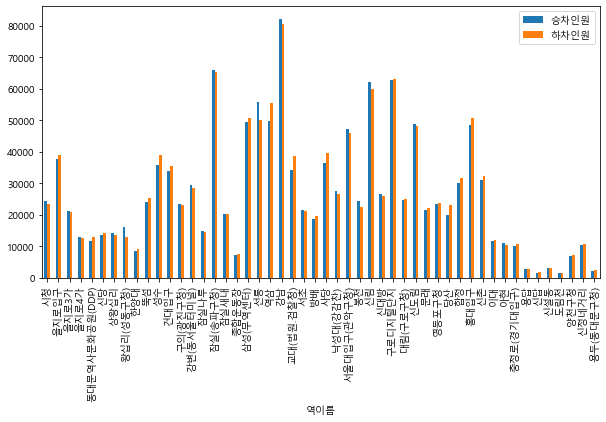

In [ ]:
# 바차트 그리기
import matplotlib.pyplot as plt

mline2 = pd.read_csv('PREPRC_지하철2호선_2019년4월1일_승하차인원.csv', encoding='ms949', index_col=0)
mline2 = mline2.set_index('역이름')
plt.rcParams["figure.figsize"] = (10, 5)
_ = mline2.plot(kind='bar')

##### 2021년 4월1일 지하철역 승하차인원 상위 20위 시각화

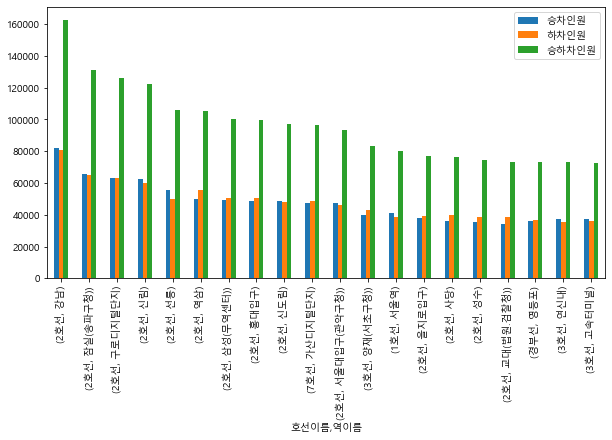

In [ ]:
# 바차트 그리기
import matplotlib.pyplot as plt

rk20 = pd.read_csv('PREPRC_2021년4월1일_지하철역별일별_승하차인원_상위20.csv', encoding="ms949", index_col=0)
rk20 = rk20.set_index(['호선이름', '역이름'])

plt.rcParams["figure.figsize"] = (10, 5)
_ = rk20.plot(kind='bar')

##### 지하철2호선 2019년 4월 주요 시간별 하차인원 시각화

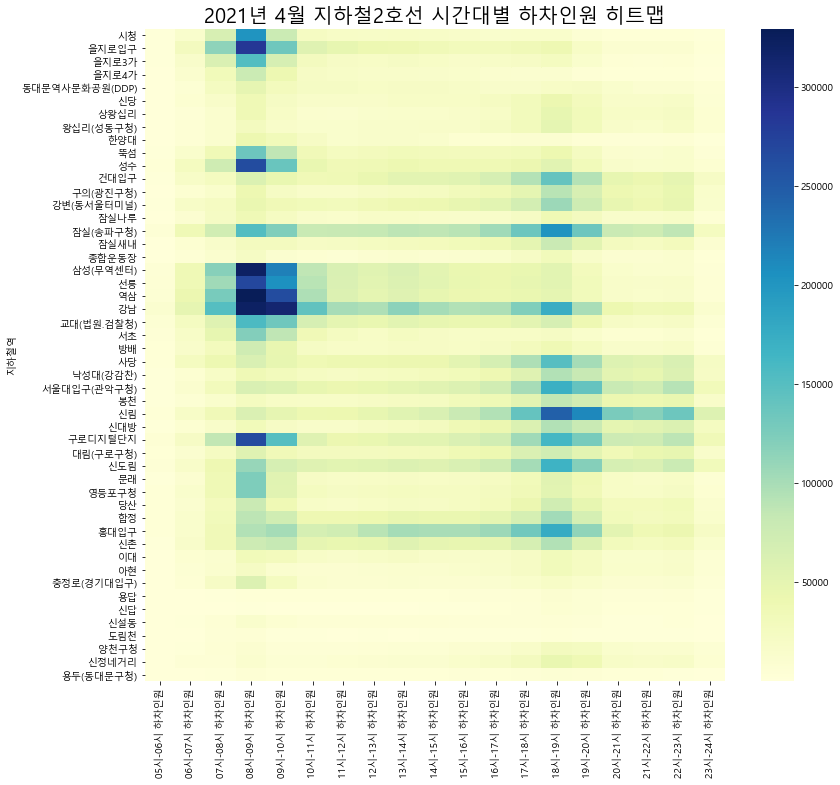

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

alight_line2 = pd.read_csv('PREPRC_지하철2호선_2019년4월_주요시간별_하차인원.csv', encoding='ms949', index_col=0)
plt.rcParams["figure.figsize"] = (13, 12)
plt.title('2021년 4월 지하철2호선 시간대별 하차인원 히트맵', fontsize=20)
sns.heatmap(alight_line2, cmap='YlGnBu')
plt.show() 

##### 서울지하철 2호선의 2019년 승하차인원 정보 지도 시각화

In [ ]:
import pandas as pd
mdf = pd.read_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949', index_col = 0)

import folium
# 그릴 위치의 평균 값의 위도, 경도를 지정헤서 그리기
map = folium.Map(location=[mdf['역위도'].mean(), mdf['역경도'].mean()], zoom_start=11, tiles='Stamen Toner')

# 역 위치에 2019년 승하차인원 정보를 원의 크기로 시각화
for n in mdf.index:
    color = 'red' if  mdf['승하차인원'][n] >= 40000000 else 'green' 
    popup = '승하차인원: ' + str(mdf['승하차인원'][n]) + '명'
    
    pstr = '승하차인원: '  + ': ' + str(mdf['승하차인원'][n]) + '명'
    popup = folium.Popup(
        pstr, min_width=150, max_width=400
    )
    folium.Marker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        icon = folium.Icon(color = color), # 붉은색 아이콘으로
        tooltip = mdf['역사명'][n] # 위치로 이동하면 역이름 출력
    ).add_to(map) 
    # 승하차인원이 년 4천만명이상 이면 붉은색, 이라면 녹색으로
    folium.CircleMarker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        popup = popup, # 위치를 클릭하면 
        radius = mdf['승하차인원'][n]/1000000, 
        color=color, fill_color='skyblue', fill=True
    ).add_to(map)

map

##### 서울지하철  2호선 역사 중심의 유동인구와 상권정보 시각화  

- 위에서 준비된 파일 3개에서 상권 좌표값을 준비해 지도에 시각화

In [ ]:
import pandas as pd

# 저장된 파일 3개 읽어와 준비
line2 = pd.read_csv('PREPRC_지하철2호선_2019년_총승하차인원_역위치.csv', encoding='ms949', index_col = 0) 
geo_line2 = line2[['역사명', '승하차인원', '역위도', '역경도']]
comm_areas = pd.read_csv('PREPRC_지하철2호선_역위치_상권정보(면적과 위치).csv', encoding='ms949', index_col = 0)
comm_areas = comm_areas[['역사명', '상권명', '면적', '좌표값']]
mdf = pd.read_csv('PREPRC_지하철2호선_역사명_상권면적총합_위도경도.csv', encoding='ms949', index_col = 0)

# 데이터프레임의 모든 좌표를 저장한 리스트
pgs = []
for i in range(len(comm_areas)):
    pts = comm_areas['좌표값'][i][8:][2:-2].replace(',', '').split(' ')
    lines = [ [ float(pts[i+1]), float(pts[i]) ] for i in range(0, len(pts), 2) ]
    pgs.append(lines)

In [ ]:
import folium
cols = ['gray', 'blue', 'green', 'purple', 'maroon', 'gold', 'skyblue', 'red', 'yellow', 'magenta']
cols += ['brown', 'teal', 'cyan', 'orange', 'aqua', 'pink', 'greybrown', 'darkgray', 'black', 'navy']
center = [mdf['역위도'].mean(), mdf['역경도'].mean()] # 평균 위치 
map = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron') # tiles='Stamen Toner'

j = 0
for i in range(len(pgs)):
    if (i == 0):
        color = cols[0]
        j += 1
    if (i != 0) and (comm_areas['역사명'][i] != comm_areas['역사명'][i-1]):
        color = cols[j % len(cols)]
        j += 1
        
    folium.Polygon(
        locations = pgs[i],
        fill = True,
        tooltip = comm_areas['역사명'][i],
        color = color
        # weight = 2.5, width = .1
    ).add_to(map)

for n in range(len(geo_line2)):
    folium.RegularPolygonMarker(
        [geo_line2['역위도'][n], geo_line2['역경도'][n]], 
        tooltip = geo_line2['역사명'][n],
        number_of_sides = 8, 
        radius = 4
    ).add_to(map) 

for n in range(len(mdf)):
    # 500미터 근방의 상권면적인 300,000(제곱미터) 이상이면 붉은색, 아니면 녹색으로
    color = 'red' if  mdf['면적'][n] >= 300000 else 'green' 
    s = '역명: ' + mdf['역사명'][n] 
    s += '<br> 2019년 일 평균승하차인원: ' + str(int(mdf['승하차인원'][n]/365)) + '(명)' 
    s += '<br> 상권면적: ' + str(int(mdf['면적'][n])) + '(제곱미터)' 
    popup = folium.Popup(
        s, 
        min_width=200, max_width=400
    )
    folium.CircleMarker(
        [mdf['역위도'][n], mdf['역경도'][n]], 
        radius = mdf['면적'][n]/20000, 
        color=color,
        fill_color='skyblue',
        popup = popup, # 위치를 클릭하면 
        fill=True
    ).add_to(map)

map

---

### 마크다운 연습

* 제목1
    * 제목2
        * 제목3

1. 순서제목1
1. 순서제목2

* 하나
     * 둘
          * 셋

+ 하나
    > + 둘
    > > + 셋

**굵은글씨**

```{.python}
def sum(a, b):
    return(a + b)
```

    def sum(a, b):
        return(a + b)

---